Initialize Libraries

In [1]:
from cProfile import label
from cmath import nan
from socketserver import DatagramRequestHandler
from turtle import color


import numpy as np
import pandas as pd
from math import pi,sqrt
import csv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import scipy as sp
import sympy
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import random

# %matplotlib qt
# plt.rcParams['text.usetex'] = True
# mpl.rcParams.update({'pgf.preamble': r'\usepackage{amsmath}'})
# plt.style.use('my_style.txt')
figsize_x = 6.5
figsize_y = 3


Load CSV and Calculate Coefficients

In [2]:
#### Store csv dataset and calculate polynomial coefficients

# read in formatted average csv
data = pd.read_csv("average_zerod_v2_101214_updated2.csv")   

# Original sequence 
x = data['0'].to_numpy()    # Diameter (in)
y = data['1'].to_numpy()    # AOA (deg)
z = data['2'].to_numpy()    # Motor Speed (kRPM)
T = data['3'].to_numpy()    # Thrust (kgf)
Q = data['4'].to_numpy()    # Torque (Nm)
T_uncert = data['5'].to_numpy()    # Thrust Standard Dev (kgf)
Q_uncert = data['6'].to_numpy()    # Torque Standard Dev (Nm)

# Determine total # of data points
num_of_points = np.size(x)

# Randomize sequences
randval = np.arange(0,num_of_points,1) 
randval = np.random.permutation(randval)
x = x[randval]
y = y[randval]
z = z[randval]
T = T[randval]
Q = Q[randval]   



# %% Thrust Coefficient Calculation with 90% of data

# Extract 90% of data
setpoint_90 = np.int32(0.9*num_of_points)
setpoint_10 = num_of_points - setpoint_90

# Validation data
x_valid = x[setpoint_90:num_of_points] 
y_valid = y[setpoint_90:num_of_points]
z_valid = z[setpoint_90:num_of_points]
T_valid = T[setpoint_90:num_of_points]
Q_valid = Q[setpoint_90:num_of_points]

g = globals()
# Define empty arrays for storing function and function gradient terms
for i in range(10,31):
       g['f_{0}'.format(i)] = np.empty(setpoint_90)
       

for j in range(10,30):
    for i in range(10,31):
       g['e_{0}{1}'.format(j,i)] = np.empty(setpoint_90) 


       
       
# Calculate function terms for each data point 
for k in range (setpoint_90):
       f_10[k] = x[k]**3
       f_11[k] = y[k]**3
       f_12[k] = z[k]**3
       f_13[k] = x[k]**2*y[k]
       f_14[k] = x[k]**2*z[k]
       f_15[k] = y[k]**2*x[k]
       f_16[k] = y[k]**2*z[k]
       f_17[k] = z[k]**2*x[k]
       f_18[k] = z[k]**2*y[k]
       f_19[k] = x[k]**2
       f_20[k] = y[k]**2
       f_21[k] = z[k]**2
       f_22[k] = x[k]*y[k]
       f_23[k] = x[k]*z[k]
       f_24[k] = y[k]*z[k]
       f_25[k] = x[k]
       f_26[k] = y[k]
       f_27[k] = z[k]
       f_28[k] = x[k]*y[k]*z[k]
       f_29[k] = 1
       f_30[k] = -T[k]

for k in range(setpoint_90):
       
       df_da = 2*f_10[k]
       e_1010[k] = df_da*f_10[k]
       e_1011[k] = df_da*f_11[k]
       e_1012[k] = df_da*f_12[k]
       e_1013[k] = df_da*f_13[k]
       e_1014[k] = df_da*f_14[k]
       e_1015[k] = df_da*f_15[k]
       e_1016[k] = df_da*f_16[k]
       e_1017[k] = df_da*f_17[k]
       e_1018[k] = df_da*f_18[k]
       e_1019[k] = df_da*f_19[k]
       e_1020[k] = df_da*f_20[k]
       e_1021[k] = df_da*f_21[k]
       e_1022[k] = df_da*f_22[k]
       e_1023[k] = df_da*f_23[k]
       e_1024[k] = df_da*f_24[k]
       e_1025[k] = df_da*f_25[k]
       e_1026[k] = df_da*f_26[k]
       e_1027[k] = df_da*f_27[k]
       e_1028[k] = df_da*f_28[k]
       e_1029[k] = df_da*f_29[k]
       e_1030[k] = df_da*f_30[k]
       
       df_da = 2*f_11[k]
       e_1110[k] = df_da * f_10[k]
       e_1111[k] = df_da * f_11[k]
       e_1112[k] = df_da * f_12[k]
       e_1113[k] = df_da * f_13[k]
       e_1114[k] = df_da * f_14[k]
       e_1115[k] = df_da * f_15[k]
       e_1116[k] = df_da * f_16[k]
       e_1117[k] = df_da * f_17[k]
       e_1118[k] = df_da * f_18[k]
       e_1119[k] = df_da * f_19[k]
       e_1120[k] = df_da * f_20[k]
       e_1121[k] = df_da * f_21[k]
       e_1122[k] = df_da * f_22[k]
       e_1123[k] = df_da * f_23[k]
       e_1124[k] = df_da * f_24[k]
       e_1125[k] = df_da * f_25[k]
       e_1126[k] = df_da * f_26[k]
       e_1127[k] = df_da * f_27[k]
       e_1128[k] = df_da * f_28[k]
       e_1129[k] = df_da * f_29[k]
       e_1130[k] = df_da * f_30[k]

       df_da = 2*f_12[k]
       e_1210[k] = df_da*f_10[k]
       e_1211[k] = df_da*f_11[k]
       e_1212[k] = df_da*f_12[k]
       e_1213[k] = df_da*f_13[k]
       e_1214[k] = df_da*f_14[k]
       e_1215[k] = df_da*f_15[k]
       e_1216[k] = df_da*f_16[k]
       e_1217[k] = df_da*f_17[k]
       e_1218[k] = df_da*f_18[k]
       e_1219[k] = df_da*f_19[k]
       e_1220[k] = df_da*f_20[k]
       e_1221[k] = df_da*f_21[k]
       e_1222[k] = df_da*f_22[k]
       e_1223[k] = df_da*f_23[k]
       e_1224[k] = df_da*f_24[k]
       e_1225[k] = df_da*f_25[k]
       e_1226[k] = df_da*f_26[k]
       e_1227[k] = df_da*f_27[k]
       e_1228[k] = df_da*f_28[k]
       e_1229[k] = df_da*f_29[k]
       e_1230[k] = df_da*f_30[k]   
       
       df_da = 2*f_13[k]
       e_1310[k] = df_da*f_10[k]
       e_1311[k] = df_da*f_11[k]
       e_1312[k] = df_da*f_12[k]
       e_1313[k] = df_da*f_13[k]
       e_1314[k] = df_da*f_14[k]
       e_1315[k] = df_da*f_15[k]
       e_1316[k] = df_da*f_16[k]
       e_1317[k] = df_da*f_17[k]
       e_1318[k] = df_da*f_18[k]
       e_1319[k] = df_da*f_19[k]
       e_1320[k] = df_da*f_20[k]
       e_1321[k] = df_da*f_21[k]
       e_1322[k] = df_da*f_22[k]
       e_1323[k] = df_da*f_23[k]
       e_1324[k] = df_da*f_24[k]
       e_1325[k] = df_da*f_25[k]
       e_1326[k] = df_da*f_26[k]
       e_1327[k] = df_da*f_27[k]
       e_1328[k] = df_da*f_28[k]
       e_1329[k] = df_da*f_29[k]
       e_1330[k] = df_da*f_30[k]    


       df_da = 2*f_14[k]
       e_1410[k] = df_da*f_10[k]
       e_1411[k] = df_da*f_11[k]
       e_1412[k] = df_da*f_12[k]
       e_1413[k] = df_da*f_13[k]
       e_1414[k] = df_da*f_14[k]
       e_1415[k] = df_da*f_15[k]
       e_1416[k] = df_da*f_16[k]
       e_1417[k] = df_da*f_17[k]
       e_1418[k] = df_da*f_18[k]
       e_1419[k] = df_da*f_19[k]
       e_1420[k] = df_da*f_20[k]
       e_1421[k] = df_da*f_21[k]
       e_1422[k] = df_da*f_22[k]
       e_1423[k] = df_da*f_23[k]
       e_1424[k] = df_da*f_24[k]
       e_1425[k] = df_da*f_25[k]
       e_1426[k] = df_da*f_26[k]
       e_1427[k] = df_da*f_27[k]
       e_1428[k] = df_da*f_28[k]
       e_1429[k] = df_da*f_29[k]
       e_1430[k] = df_da*f_30[k]
       
       df_da = 2*f_15[k]
       e_1510[k] = df_da*f_10[k]
       e_1511[k] = df_da*f_11[k]
       e_1512[k] = df_da*f_12[k]
       e_1513[k] = df_da*f_13[k]
       e_1514[k] = df_da*f_14[k]
       e_1515[k] = df_da*f_15[k]
       e_1516[k] = df_da*f_16[k]
       e_1517[k] = df_da*f_17[k]
       e_1518[k] = df_da*f_18[k]
       e_1519[k] = df_da*f_19[k]
       e_1520[k] = df_da*f_20[k]
       e_1521[k] = df_da*f_21[k]
       e_1522[k] = df_da*f_22[k]
       e_1523[k] = df_da*f_23[k]
       e_1524[k] = df_da*f_24[k]
       e_1525[k] = df_da*f_25[k]
       e_1526[k] = df_da*f_26[k]
       e_1527[k] = df_da*f_27[k]
       e_1528[k] = df_da*f_28[k]
       e_1529[k] = df_da*f_29[k]
       e_1530[k] = df_da*f_30[k]
       
       df_da = 2*f_16[k]
       e_1610[k] = df_da*f_10[k]
       e_1611[k] = df_da*f_11[k]
       e_1612[k] = df_da*f_12[k]
       e_1613[k] = df_da*f_13[k]
       e_1614[k] = df_da*f_14[k]
       e_1615[k] = df_da*f_15[k]
       e_1616[k] = df_da*f_16[k]
       e_1617[k] = df_da*f_17[k]
       e_1618[k] = df_da*f_18[k]
       e_1619[k] = df_da*f_19[k]
       e_1620[k] = df_da*f_20[k]
       e_1621[k] = df_da*f_21[k]
       e_1622[k] = df_da*f_22[k]
       e_1623[k] = df_da*f_23[k]
       e_1624[k] = df_da*f_24[k]
       e_1625[k] = df_da*f_25[k]
       e_1626[k] = df_da*f_26[k]
       e_1627[k] = df_da*f_27[k]
       e_1628[k] = df_da*f_28[k]
       e_1629[k] = df_da*f_29[k]
       e_1630[k] = df_da*f_30[k]
       

       df_da = 2*f_17[k]
       e_1710[k] = df_da*f_10[k]
       e_1711[k] = df_da*f_11[k]
       e_1712[k] = df_da*f_12[k]
       e_1713[k] = df_da*f_13[k]
       e_1714[k] = df_da*f_14[k]
       e_1715[k] = df_da*f_15[k]
       e_1716[k] = df_da*f_16[k]
       e_1717[k] = df_da*f_17[k]
       e_1718[k] = df_da*f_18[k]
       e_1719[k] = df_da*f_19[k]
       e_1720[k] = df_da*f_20[k]
       e_1721[k] = df_da*f_21[k]
       e_1722[k] = df_da*f_22[k]
       e_1723[k] = df_da*f_23[k]
       e_1724[k] = df_da*f_24[k]
       e_1725[k] = df_da*f_25[k]
       e_1726[k] = df_da*f_26[k]
       e_1727[k] = df_da*f_27[k]
       e_1728[k] = df_da*f_28[k]
       e_1729[k] = df_da*f_29[k]
       e_1730[k] = df_da*f_30[k]
       
       df_da = 2*f_18[k]
       e_1810[k] = df_da*f_10[k]
       e_1811[k] = df_da*f_11[k]
       e_1812[k] = df_da*f_12[k]
       e_1813[k] = df_da*f_13[k]
       e_1814[k] = df_da*f_14[k]
       e_1815[k] = df_da*f_15[k]
       e_1816[k] = df_da*f_16[k]
       e_1817[k] = df_da*f_17[k]
       e_1818[k] = df_da*f_18[k]
       e_1819[k] = df_da*f_19[k]
       e_1820[k] = df_da*f_20[k]
       e_1821[k] = df_da*f_21[k]
       e_1822[k] = df_da*f_22[k]
       e_1823[k] = df_da*f_23[k]
       e_1824[k] = df_da*f_24[k]
       e_1825[k] = df_da*f_25[k]
       e_1826[k] = df_da*f_26[k]
       e_1827[k] = df_da*f_27[k]
       e_1828[k] = df_da*f_28[k]
       e_1829[k] = df_da*f_29[k]
       e_1830[k] = df_da*f_30[k]
       
       
       df_da = 2*f_19[k]
       e_1910[k] = df_da*f_10[k]
       e_1911[k] = df_da*f_11[k]
       e_1912[k] = df_da*f_12[k]
       e_1913[k] = df_da*f_13[k]
       e_1914[k] = df_da*f_14[k]
       e_1915[k] = df_da*f_15[k]
       e_1916[k] = df_da*f_16[k]
       e_1917[k] = df_da*f_17[k]
       e_1918[k] = df_da*f_18[k]
       e_1919[k] = df_da*f_19[k]
       e_1920[k] = df_da*f_20[k]
       e_1921[k] = df_da*f_21[k]
       e_1922[k] = df_da*f_22[k]
       e_1923[k] = df_da*f_23[k]
       e_1924[k] = df_da*f_24[k]
       e_1925[k] = df_da*f_25[k]
       e_1926[k] = df_da*f_26[k]
       e_1927[k] = df_da*f_27[k]
       e_1928[k] = df_da*f_28[k]
       e_1929[k] = df_da*f_29[k]
       e_1930[k] = df_da*f_30[k]

       
       df_da = 2*f_20[k]
       e_2010[k] = df_da*f_10[k]
       e_2011[k] = df_da*f_11[k]
       e_2012[k] = df_da*f_12[k]
       e_2013[k] = df_da*f_13[k]
       e_2014[k] = df_da*f_14[k]
       e_2015[k] = df_da*f_15[k]
       e_2016[k] = df_da*f_16[k]
       e_2017[k] = df_da*f_17[k]
       e_2018[k] = df_da*f_18[k]
       e_2019[k] = df_da*f_19[k]
       e_2020[k] = df_da*f_20[k]
       e_2021[k] = df_da*f_21[k]
       e_2022[k] = df_da*f_22[k]
       e_2023[k] = df_da*f_23[k]
       e_2024[k] = df_da*f_24[k]
       e_2025[k] = df_da*f_25[k]
       e_2026[k] = df_da*f_26[k]
       e_2027[k] = df_da*f_27[k]
       e_2028[k] = df_da*f_28[k]
       e_2029[k] = df_da*f_29[k]
       e_2030[k] = df_da*f_30[k]


       df_da = 2*f_21[k]
       e_2110[k] = df_da*f_10[k]
       e_2111[k] = df_da*f_11[k]
       e_2112[k] = df_da*f_12[k]
       e_2113[k] = df_da*f_13[k]
       e_2114[k] = df_da*f_14[k]
       e_2115[k] = df_da*f_15[k]
       e_2116[k] = df_da*f_16[k]
       e_2117[k] = df_da*f_17[k]
       e_2118[k] = df_da*f_18[k]
       e_2119[k] = df_da*f_19[k]
       e_2120[k] = df_da*f_20[k]
       e_2121[k] = df_da*f_21[k]
       e_2122[k] = df_da*f_22[k]
       e_2123[k] = df_da*f_23[k]
       e_2124[k] = df_da*f_24[k]
       e_2125[k] = df_da*f_25[k]
       e_2126[k] = df_da*f_26[k]
       e_2127[k] = df_da*f_27[k]
       e_2128[k] = df_da*f_28[k]
       e_2129[k] = df_da*f_29[k]
       e_2130[k] = df_da*f_30[k]
       
       
       df_da = 2*f_22[k]
       e_2210[k] = df_da*f_10[k]
       e_2211[k] = df_da*f_11[k]
       e_2212[k] = df_da*f_12[k]
       e_2213[k] = df_da*f_13[k]
       e_2214[k] = df_da*f_14[k]
       e_2215[k] = df_da*f_15[k]
       e_2216[k] = df_da*f_16[k]
       e_2217[k] = df_da*f_17[k]
       e_2218[k] = df_da*f_18[k]
       e_2219[k] = df_da*f_19[k]
       e_2220[k] = df_da*f_20[k]
       e_2221[k] = df_da*f_21[k]
       e_2222[k] = df_da*f_22[k]
       e_2223[k] = df_da*f_23[k]
       e_2224[k] = df_da*f_24[k]
       e_2225[k] = df_da*f_25[k]
       e_2226[k] = df_da*f_26[k]
       e_2227[k] = df_da*f_27[k]
       e_2228[k] = df_da*f_28[k]
       e_2229[k] = df_da*f_29[k]
       e_2230[k] = df_da*f_30[k]
       
       
       df_da = 2*f_23[k]
       e_2310[k] = df_da*f_10[k]
       e_2311[k] = df_da*f_11[k]
       e_2312[k] = df_da*f_12[k]
       e_2313[k] = df_da*f_13[k]
       e_2314[k] = df_da*f_14[k]
       e_2315[k] = df_da*f_15[k]
       e_2316[k] = df_da*f_16[k]
       e_2317[k] = df_da*f_17[k]
       e_2318[k] = df_da*f_18[k]
       e_2319[k] = df_da*f_19[k]
       e_2320[k] = df_da*f_20[k]
       e_2321[k] = df_da*f_21[k]
       e_2322[k] = df_da*f_22[k]
       e_2323[k] = df_da*f_23[k]
       e_2324[k] = df_da*f_24[k]
       e_2325[k] = df_da*f_25[k]
       e_2326[k] = df_da*f_26[k]
       e_2327[k] = df_da*f_27[k]
       e_2328[k] = df_da*f_28[k]
       e_2329[k] = df_da*f_29[k]
       e_2330[k] = df_da*f_30[k]
       
       
       df_da = 2*f_24[k]
       e_2410[k] = df_da*f_10[k]
       e_2411[k] = df_da*f_11[k]
       e_2412[k] = df_da*f_12[k]
       e_2413[k] = df_da*f_13[k]
       e_2414[k] = df_da*f_14[k]
       e_2415[k] = df_da*f_15[k]
       e_2416[k] = df_da*f_16[k]
       e_2417[k] = df_da*f_17[k]
       e_2418[k] = df_da*f_18[k]
       e_2419[k] = df_da*f_19[k]
       e_2420[k] = df_da*f_20[k]
       e_2421[k] = df_da*f_21[k]
       e_2422[k] = df_da*f_22[k]
       e_2423[k] = df_da*f_23[k]
       e_2424[k] = df_da*f_24[k]
       e_2425[k] = df_da*f_25[k]
       e_2426[k] = df_da*f_26[k]
       e_2427[k] = df_da*f_27[k]
       e_2428[k] = df_da*f_28[k]
       e_2429[k] = df_da*f_29[k]
       e_2430[k] = df_da*f_30[k]
       
       
       df_da = 2*f_25[k]
       e_2510[k] = df_da*f_10[k]
       e_2511[k] = df_da*f_11[k]
       e_2512[k] = df_da*f_12[k]
       e_2513[k] = df_da*f_13[k]
       e_2514[k] = df_da*f_14[k]
       e_2515[k] = df_da*f_15[k]
       e_2516[k] = df_da*f_16[k]
       e_2517[k] = df_da*f_17[k]
       e_2518[k] = df_da*f_18[k]
       e_2519[k] = df_da*f_19[k]
       e_2520[k] = df_da*f_20[k]
       e_2521[k] = df_da*f_21[k]
       e_2522[k] = df_da*f_22[k]
       e_2523[k] = df_da*f_23[k]
       e_2524[k] = df_da*f_24[k]
       e_2525[k] = df_da*f_25[k]
       e_2526[k] = df_da*f_26[k]
       e_2527[k] = df_da*f_27[k]
       e_2528[k] = df_da*f_28[k]
       e_2529[k] = df_da*f_29[k]
       e_2530[k] = df_da*f_30[k]
       
       
       df_da = 2*f_26[k]
       e_2610[k] = df_da*f_10[k]
       e_2611[k] = df_da*f_11[k]
       e_2612[k] = df_da*f_12[k]
       e_2613[k] = df_da*f_13[k]
       e_2614[k] = df_da*f_14[k]
       e_2615[k] = df_da*f_15[k]
       e_2616[k] = df_da*f_16[k]
       e_2617[k] = df_da*f_17[k]
       e_2618[k] = df_da*f_18[k]
       e_2619[k] = df_da*f_19[k]
       e_2620[k] = df_da*f_20[k]
       e_2621[k] = df_da*f_21[k]
       e_2622[k] = df_da*f_22[k]
       e_2623[k] = df_da*f_23[k]
       e_2624[k] = df_da*f_24[k]
       e_2625[k] = df_da*f_25[k]
       e_2626[k] = df_da*f_26[k]
       e_2627[k] = df_da*f_27[k]
       e_2628[k] = df_da*f_28[k]
       e_2629[k] = df_da*f_29[k]
       e_2630[k] = df_da*f_30[k]
       
       
       df_da = 2*f_27[k]
       e_2710[k] = df_da*f_10[k]
       e_2711[k] = df_da*f_11[k]
       e_2712[k] = df_da*f_12[k]
       e_2713[k] = df_da*f_13[k]
       e_2714[k] = df_da*f_14[k]
       e_2715[k] = df_da*f_15[k]
       e_2716[k] = df_da*f_16[k]
       e_2717[k] = df_da*f_17[k]
       e_2718[k] = df_da*f_18[k]
       e_2719[k] = df_da*f_19[k]
       e_2720[k] = df_da*f_20[k]
       e_2721[k] = df_da*f_21[k]
       e_2722[k] = df_da*f_22[k]
       e_2723[k] = df_da*f_23[k]
       e_2724[k] = df_da*f_24[k]
       e_2725[k] = df_da*f_25[k]
       e_2726[k] = df_da*f_26[k]
       e_2727[k] = df_da*f_27[k]
       e_2728[k] = df_da*f_28[k]
       e_2729[k] = df_da*f_29[k]
       e_2730[k] = df_da*f_30[k]
       
       
       df_da = 2*f_28[k]
       e_2810[k] = df_da*f_10[k]
       e_2811[k] = df_da*f_11[k]
       e_2812[k] = df_da*f_12[k]
       e_2813[k] = df_da*f_13[k]
       e_2814[k] = df_da*f_14[k]
       e_2815[k] = df_da*f_15[k]
       e_2816[k] = df_da*f_16[k]
       e_2817[k] = df_da*f_17[k]
       e_2818[k] = df_da*f_18[k]
       e_2819[k] = df_da*f_19[k]
       e_2820[k] = df_da*f_20[k]
       e_2821[k] = df_da*f_21[k]
       e_2822[k] = df_da*f_22[k]
       e_2823[k] = df_da*f_23[k]
       e_2824[k] = df_da*f_24[k]
       e_2825[k] = df_da*f_25[k]
       e_2826[k] = df_da*f_26[k]
       e_2827[k] = df_da*f_27[k]
       e_2828[k] = df_da*f_28[k]
       e_2829[k] = df_da*f_29[k]
       e_2830[k] = df_da*f_30[k]


       df_da = 2*f_29[k]
       e_2910[k] = df_da*f_10[k]
       e_2911[k] = df_da*f_11[k]
       e_2912[k] = df_da*f_12[k]
       e_2913[k] = df_da*f_13[k]
       e_2914[k] = df_da*f_14[k]
       e_2915[k] = df_da*f_15[k]
       e_2916[k] = df_da*f_16[k]
       e_2917[k] = df_da*f_17[k]
       e_2918[k] = df_da*f_18[k]
       e_2919[k] = df_da*f_19[k]
       e_2920[k] = df_da*f_20[k]
       e_2921[k] = df_da*f_21[k]
       e_2922[k] = df_da*f_22[k]
       e_2923[k] = df_da*f_23[k]
       e_2924[k] = df_da*f_24[k]
       e_2925[k] = df_da*f_25[k]
       e_2926[k] = df_da*f_26[k]
       e_2927[k] = df_da*f_27[k]
       e_2928[k] = df_da*f_28[k]
       e_2929[k] = df_da*f_29[k]
       e_2930[k] = df_da*f_30[k]
       
# sum of terms in each gradient term array
for j in range(10,30):
    for i in range(10,31):
        g['e_{0}{1}'.format(j,i)] = np.sum(g['e_{0}{1}'.format(j,i)])


##### Linear equation solver

# gradient matrix
M = np.array([[e_1010, e_1011, e_1012, e_1013, e_1014, e_1015, e_1016, e_1017, e_1018, e_1019, e_1020, e_1021, e_1022, e_1023, e_1024, e_1025, e_1026, 
               e_1027, e_1028, e_1029],
[e_1110, e_1111, e_1112, e_1113, e_1114, e_1115, e_1116, e_1117, e_1118, e_1119, e_1120, e_1121, e_1122, e_1123, e_1124, e_1125, e_1126, 
               e_1127, e_1128, e_1129],
[e_1210, e_1211, e_1212, e_1213, e_1214, e_1215, e_1216, e_1217, e_1218, e_1219, e_1220, e_1221, e_1222, e_1223, e_1224, e_1225, e_1226, 
               e_1227, e_1228, e_1229],
[e_1310, e_1311, e_1312, e_1313, e_1314, e_1315, e_1316, e_1317, e_1318, e_1319, e_1320, e_1321, e_1322, e_1323, e_1324, e_1325, e_1326, 
               e_1327, e_1328, e_1329],
[e_1410, e_1411, e_1412, e_1413, e_1414, e_1415, e_1416, e_1417, e_1418, e_1419, e_1420, e_1421, e_1422, e_1423, e_1424, e_1425, e_1426, 
               e_1427, e_1428, e_1429],
[e_1510, e_1511, e_1512, e_1513, e_1514, e_1515, e_1516, e_1517, e_1518, e_1519, e_1520, e_1521, e_1522, e_1523, e_1524, e_1525, e_1526, 
               e_1527, e_1528, e_1529],
[e_1610, e_1611, e_1612, e_1613, e_1614, e_1615, e_1616, e_1617, e_1618, e_1619, e_1620, e_1621, e_1622, e_1623, e_1624, e_1625, e_1626, 
               e_1627, e_1628, e_1629],
[e_1710, e_1711, e_1712, e_1713, e_1714, e_1715, e_1716, e_1717, e_1718, e_1719, e_1720, e_1721, e_1722, e_1723, e_1724, e_1725, e_1726, 
               e_1727, e_1728, e_1729],
[e_1810, e_1811, e_1812, e_1813, e_1814, e_1815, e_1816, e_1817, e_1818, e_1819, e_1820, e_1821, e_1822, e_1823, e_1824, e_1825, e_1826, 
               e_1827, e_1828, e_1829], 
[e_1910, e_1911, e_1912, e_1913, e_1914, e_1915, e_1916, e_1917, e_1918, e_1919, e_1920, e_1921, e_1922, e_1923, e_1924, e_1925, e_1926, 
               e_1927, e_1928, e_1929],
[e_2010, e_2011, e_2012, e_2013, e_2014, e_2015, e_2016, e_2017, e_2018, e_2019, e_2020, e_2021, e_2022, e_2023, e_2024, e_2025, e_2026, 
               e_2027, e_2028, e_2029],
[e_2110, e_2111, e_2112, e_2113, e_2114, e_2115, e_2116, e_2117, e_2118, e_2119, e_2120, e_2121, e_2122, e_2123, e_2124, e_2125, e_2126, 
               e_2127, e_2128, e_2129],
[e_2210, e_2211, e_2212, e_2213, e_2214, e_2215, e_2216, e_2217, e_2218, e_2219, e_2220, e_2221, e_2222, e_2223, e_2224, e_2225, e_2226, 
               e_2227, e_2228, e_2229],
[e_2310, e_2311, e_2312, e_2313, e_2314, e_2315, e_2316, e_2317, e_2318, e_2319, e_2320, e_2321, e_2322, e_2323, e_2324, e_2325, e_2326, 
               e_2327, e_2328, e_2329],
[e_2410, e_2411, e_2412, e_2413, e_2414, e_2415, e_2416, e_2417, e_2418, e_2419, e_2420, e_2421, e_2422, e_2423, e_2424, e_2425, e_2426, 
               e_2427, e_2428, e_2429],
[e_2510, e_2511, e_2512, e_2513, e_2514, e_2515, e_2516, e_2517, e_2518, e_2519, e_2520, e_2521, e_2522, e_2523, e_2524, e_2525, e_2526, 
               e_2527, e_2528, e_2529],
[e_2610, e_2611, e_2612, e_2613, e_2614, e_2615, e_2616, e_2617, e_2618, e_2619, e_2620, e_2621, e_2622, e_2623, e_2624, e_2625, e_2626, 
               e_2627, e_2628, e_2629],
[e_2710, e_2711, e_2712, e_2713, e_2714, e_2715, e_2716, e_2717, e_2718, e_2719, e_2720, e_2721, e_2722, e_2723, e_2724, e_2725, e_2726, 
               e_2727, e_2728, e_2729],
[e_2810, e_2811, e_2812, e_2813, e_2814, e_2815, e_2816, e_2817, e_2818, e_2819, e_2820, e_2821, e_2822, e_2823, e_2824, e_2825, e_2826, 
               e_2827, e_2828, e_2829],
[e_2910, e_2911, e_2912, e_2913, e_2914, e_2915, e_2916, e_2917, e_2918, e_2919, e_2920, e_2921, e_2922, e_2923, e_2924, e_2925, e_2926, 
               e_2927, e_2928, e_2929]])

# Measurement array
b =-1*np.array([e_1030, e_1130, e_1230, e_1330, e_1430, e_1530, e_1630, e_1730, e_1830, e_1930, e_2030, e_2130, e_2230, e_2330, 
                e_2430, e_2530, e_2630, e_2730, e_2830, e_2930])

# Solve for optimized coefficients
a_star_T = np.linalg.solve(M, b)


# %% Thrust Coefficient Calculation with 90% of data

# Extract 90% of data
setpoint_90 = np.int32(0.9*num_of_points)


g = globals()
# Define empty arrays for storing function and function gradient terms
for i in range(10,31):
       g['f_{0}'.format(i)] = np.empty(setpoint_90)
       

for j in range(10,30):
    for i in range(10,31):
       g['e_{0}{1}'.format(j,i)] = np.empty(setpoint_90) 

############################## Q
       
# Calculate function terms for each data point 
for k in range (setpoint_90):
       f_10[k] = x[k]**3
       f_11[k] = y[k]**3
       f_12[k] = z[k]**3
       f_13[k] = x[k]**2*y[k]
       f_14[k] = x[k]**2*z[k]
       f_15[k] = y[k]**2*x[k]
       f_16[k] = y[k]**2*z[k]
       f_17[k] = z[k]**2*x[k]
       f_18[k] = z[k]**2*y[k]
       f_19[k] = x[k]**2
       f_20[k] = y[k]**2
       f_21[k] = z[k]**2
       f_22[k] = x[k]*y[k]
       f_23[k] = x[k]*z[k]
       f_24[k] = y[k]*z[k]
       f_25[k] = x[k]
       f_26[k] = y[k]
       f_27[k] = z[k]
       f_28[k] = x[k]*y[k]*z[k]
       f_29[k] = 1
       f_30[k] = -Q[k]
       

for k in range(setpoint_90):
       
       df_da = 2*f_10[k]
       e_1010[k] = df_da*f_10[k]
       e_1011[k] = df_da*f_11[k]
       e_1012[k] = df_da*f_12[k]
       e_1013[k] = df_da*f_13[k]
       e_1014[k] = df_da*f_14[k]
       e_1015[k] = df_da*f_15[k]
       e_1016[k] = df_da*f_16[k]
       e_1017[k] = df_da*f_17[k]
       e_1018[k] = df_da*f_18[k]
       e_1019[k] = df_da*f_19[k]
       e_1020[k] = df_da*f_20[k]
       e_1021[k] = df_da*f_21[k]
       e_1022[k] = df_da*f_22[k]
       e_1023[k] = df_da*f_23[k]
       e_1024[k] = df_da*f_24[k]
       e_1025[k] = df_da*f_25[k]
       e_1026[k] = df_da*f_26[k]
       e_1027[k] = df_da*f_27[k]
       e_1028[k] = df_da*f_28[k]
       e_1029[k] = df_da*f_29[k]
       e_1030[k] = df_da*f_30[k]
       
       df_da = 2*f_11[k]
       e_1110[k] = df_da * f_10[k]
       e_1111[k] = df_da * f_11[k]
       e_1112[k] = df_da * f_12[k]
       e_1113[k] = df_da * f_13[k]
       e_1114[k] = df_da * f_14[k]
       e_1115[k] = df_da * f_15[k]
       e_1116[k] = df_da * f_16[k]
       e_1117[k] = df_da * f_17[k]
       e_1118[k] = df_da * f_18[k]
       e_1119[k] = df_da * f_19[k]
       e_1120[k] = df_da * f_20[k]
       e_1121[k] = df_da * f_21[k]
       e_1122[k] = df_da * f_22[k]
       e_1123[k] = df_da * f_23[k]
       e_1124[k] = df_da * f_24[k]
       e_1125[k] = df_da * f_25[k]
       e_1126[k] = df_da * f_26[k]
       e_1127[k] = df_da * f_27[k]
       e_1128[k] = df_da * f_28[k]
       e_1129[k] = df_da * f_29[k]
       e_1130[k] = df_da * f_30[k]

       df_da = 2*f_12[k]
       e_1210[k] = df_da*f_10[k]
       e_1211[k] = df_da*f_11[k]
       e_1212[k] = df_da*f_12[k]
       e_1213[k] = df_da*f_13[k]
       e_1214[k] = df_da*f_14[k]
       e_1215[k] = df_da*f_15[k]
       e_1216[k] = df_da*f_16[k]
       e_1217[k] = df_da*f_17[k]
       e_1218[k] = df_da*f_18[k]
       e_1219[k] = df_da*f_19[k]
       e_1220[k] = df_da*f_20[k]
       e_1221[k] = df_da*f_21[k]
       e_1222[k] = df_da*f_22[k]
       e_1223[k] = df_da*f_23[k]
       e_1224[k] = df_da*f_24[k]
       e_1225[k] = df_da*f_25[k]
       e_1226[k] = df_da*f_26[k]
       e_1227[k] = df_da*f_27[k]
       e_1228[k] = df_da*f_28[k]
       e_1229[k] = df_da*f_29[k]
       e_1230[k] = df_da*f_30[k]   
       
       df_da = 2*f_13[k]
       e_1310[k] = df_da*f_10[k]
       e_1311[k] = df_da*f_11[k]
       e_1312[k] = df_da*f_12[k]
       e_1313[k] = df_da*f_13[k]
       e_1314[k] = df_da*f_14[k]
       e_1315[k] = df_da*f_15[k]
       e_1316[k] = df_da*f_16[k]
       e_1317[k] = df_da*f_17[k]
       e_1318[k] = df_da*f_18[k]
       e_1319[k] = df_da*f_19[k]
       e_1320[k] = df_da*f_20[k]
       e_1321[k] = df_da*f_21[k]
       e_1322[k] = df_da*f_22[k]
       e_1323[k] = df_da*f_23[k]
       e_1324[k] = df_da*f_24[k]
       e_1325[k] = df_da*f_25[k]
       e_1326[k] = df_da*f_26[k]
       e_1327[k] = df_da*f_27[k]
       e_1328[k] = df_da*f_28[k]
       e_1329[k] = df_da*f_29[k]
       e_1330[k] = df_da*f_30[k]    


       df_da = 2*f_14[k]
       e_1410[k] = df_da*f_10[k]
       e_1411[k] = df_da*f_11[k]
       e_1412[k] = df_da*f_12[k]
       e_1413[k] = df_da*f_13[k]
       e_1414[k] = df_da*f_14[k]
       e_1415[k] = df_da*f_15[k]
       e_1416[k] = df_da*f_16[k]
       e_1417[k] = df_da*f_17[k]
       e_1418[k] = df_da*f_18[k]
       e_1419[k] = df_da*f_19[k]
       e_1420[k] = df_da*f_20[k]
       e_1421[k] = df_da*f_21[k]
       e_1422[k] = df_da*f_22[k]
       e_1423[k] = df_da*f_23[k]
       e_1424[k] = df_da*f_24[k]
       e_1425[k] = df_da*f_25[k]
       e_1426[k] = df_da*f_26[k]
       e_1427[k] = df_da*f_27[k]
       e_1428[k] = df_da*f_28[k]
       e_1429[k] = df_da*f_29[k]
       e_1430[k] = df_da*f_30[k]
       
       df_da = 2*f_15[k]
       e_1510[k] = df_da*f_10[k]
       e_1511[k] = df_da*f_11[k]
       e_1512[k] = df_da*f_12[k]
       e_1513[k] = df_da*f_13[k]
       e_1514[k] = df_da*f_14[k]
       e_1515[k] = df_da*f_15[k]
       e_1516[k] = df_da*f_16[k]
       e_1517[k] = df_da*f_17[k]
       e_1518[k] = df_da*f_18[k]
       e_1519[k] = df_da*f_19[k]
       e_1520[k] = df_da*f_20[k]
       e_1521[k] = df_da*f_21[k]
       e_1522[k] = df_da*f_22[k]
       e_1523[k] = df_da*f_23[k]
       e_1524[k] = df_da*f_24[k]
       e_1525[k] = df_da*f_25[k]
       e_1526[k] = df_da*f_26[k]
       e_1527[k] = df_da*f_27[k]
       e_1528[k] = df_da*f_28[k]
       e_1529[k] = df_da*f_29[k]
       e_1530[k] = df_da*f_30[k]
       
       df_da = 2*f_16[k]
       e_1610[k] = df_da*f_10[k]
       e_1611[k] = df_da*f_11[k]
       e_1612[k] = df_da*f_12[k]
       e_1613[k] = df_da*f_13[k]
       e_1614[k] = df_da*f_14[k]
       e_1615[k] = df_da*f_15[k]
       e_1616[k] = df_da*f_16[k]
       e_1617[k] = df_da*f_17[k]
       e_1618[k] = df_da*f_18[k]
       e_1619[k] = df_da*f_19[k]
       e_1620[k] = df_da*f_20[k]
       e_1621[k] = df_da*f_21[k]
       e_1622[k] = df_da*f_22[k]
       e_1623[k] = df_da*f_23[k]
       e_1624[k] = df_da*f_24[k]
       e_1625[k] = df_da*f_25[k]
       e_1626[k] = df_da*f_26[k]
       e_1627[k] = df_da*f_27[k]
       e_1628[k] = df_da*f_28[k]
       e_1629[k] = df_da*f_29[k]
       e_1630[k] = df_da*f_30[k]
       

       df_da = 2*f_17[k]
       e_1710[k] = df_da*f_10[k]
       e_1711[k] = df_da*f_11[k]
       e_1712[k] = df_da*f_12[k]
       e_1713[k] = df_da*f_13[k]
       e_1714[k] = df_da*f_14[k]
       e_1715[k] = df_da*f_15[k]
       e_1716[k] = df_da*f_16[k]
       e_1717[k] = df_da*f_17[k]
       e_1718[k] = df_da*f_18[k]
       e_1719[k] = df_da*f_19[k]
       e_1720[k] = df_da*f_20[k]
       e_1721[k] = df_da*f_21[k]
       e_1722[k] = df_da*f_22[k]
       e_1723[k] = df_da*f_23[k]
       e_1724[k] = df_da*f_24[k]
       e_1725[k] = df_da*f_25[k]
       e_1726[k] = df_da*f_26[k]
       e_1727[k] = df_da*f_27[k]
       e_1728[k] = df_da*f_28[k]
       e_1729[k] = df_da*f_29[k]
       e_1730[k] = df_da*f_30[k]
       
       df_da = 2*f_18[k]
       e_1810[k] = df_da*f_10[k]
       e_1811[k] = df_da*f_11[k]
       e_1812[k] = df_da*f_12[k]
       e_1813[k] = df_da*f_13[k]
       e_1814[k] = df_da*f_14[k]
       e_1815[k] = df_da*f_15[k]
       e_1816[k] = df_da*f_16[k]
       e_1817[k] = df_da*f_17[k]
       e_1818[k] = df_da*f_18[k]
       e_1819[k] = df_da*f_19[k]
       e_1820[k] = df_da*f_20[k]
       e_1821[k] = df_da*f_21[k]
       e_1822[k] = df_da*f_22[k]
       e_1823[k] = df_da*f_23[k]
       e_1824[k] = df_da*f_24[k]
       e_1825[k] = df_da*f_25[k]
       e_1826[k] = df_da*f_26[k]
       e_1827[k] = df_da*f_27[k]
       e_1828[k] = df_da*f_28[k]
       e_1829[k] = df_da*f_29[k]
       e_1830[k] = df_da*f_30[k]
       
       
       df_da = 2*f_19[k]
       e_1910[k] = df_da*f_10[k]
       e_1911[k] = df_da*f_11[k]
       e_1912[k] = df_da*f_12[k]
       e_1913[k] = df_da*f_13[k]
       e_1914[k] = df_da*f_14[k]
       e_1915[k] = df_da*f_15[k]
       e_1916[k] = df_da*f_16[k]
       e_1917[k] = df_da*f_17[k]
       e_1918[k] = df_da*f_18[k]
       e_1919[k] = df_da*f_19[k]
       e_1920[k] = df_da*f_20[k]
       e_1921[k] = df_da*f_21[k]
       e_1922[k] = df_da*f_22[k]
       e_1923[k] = df_da*f_23[k]
       e_1924[k] = df_da*f_24[k]
       e_1925[k] = df_da*f_25[k]
       e_1926[k] = df_da*f_26[k]
       e_1927[k] = df_da*f_27[k]
       e_1928[k] = df_da*f_28[k]
       e_1929[k] = df_da*f_29[k]
       e_1930[k] = df_da*f_30[k]

       
       df_da = 2*f_20[k]
       e_2010[k] = df_da*f_10[k]
       e_2011[k] = df_da*f_11[k]
       e_2012[k] = df_da*f_12[k]
       e_2013[k] = df_da*f_13[k]
       e_2014[k] = df_da*f_14[k]
       e_2015[k] = df_da*f_15[k]
       e_2016[k] = df_da*f_16[k]
       e_2017[k] = df_da*f_17[k]
       e_2018[k] = df_da*f_18[k]
       e_2019[k] = df_da*f_19[k]
       e_2020[k] = df_da*f_20[k]
       e_2021[k] = df_da*f_21[k]
       e_2022[k] = df_da*f_22[k]
       e_2023[k] = df_da*f_23[k]
       e_2024[k] = df_da*f_24[k]
       e_2025[k] = df_da*f_25[k]
       e_2026[k] = df_da*f_26[k]
       e_2027[k] = df_da*f_27[k]
       e_2028[k] = df_da*f_28[k]
       e_2029[k] = df_da*f_29[k]
       e_2030[k] = df_da*f_30[k]


       df_da = 2*f_21[k]
       e_2110[k] = df_da*f_10[k]
       e_2111[k] = df_da*f_11[k]
       e_2112[k] = df_da*f_12[k]
       e_2113[k] = df_da*f_13[k]
       e_2114[k] = df_da*f_14[k]
       e_2115[k] = df_da*f_15[k]
       e_2116[k] = df_da*f_16[k]
       e_2117[k] = df_da*f_17[k]
       e_2118[k] = df_da*f_18[k]
       e_2119[k] = df_da*f_19[k]
       e_2120[k] = df_da*f_20[k]
       e_2121[k] = df_da*f_21[k]
       e_2122[k] = df_da*f_22[k]
       e_2123[k] = df_da*f_23[k]
       e_2124[k] = df_da*f_24[k]
       e_2125[k] = df_da*f_25[k]
       e_2126[k] = df_da*f_26[k]
       e_2127[k] = df_da*f_27[k]
       e_2128[k] = df_da*f_28[k]
       e_2129[k] = df_da*f_29[k]
       e_2130[k] = df_da*f_30[k]
       
       
       df_da = 2*f_22[k]
       e_2210[k] = df_da*f_10[k]
       e_2211[k] = df_da*f_11[k]
       e_2212[k] = df_da*f_12[k]
       e_2213[k] = df_da*f_13[k]
       e_2214[k] = df_da*f_14[k]
       e_2215[k] = df_da*f_15[k]
       e_2216[k] = df_da*f_16[k]
       e_2217[k] = df_da*f_17[k]
       e_2218[k] = df_da*f_18[k]
       e_2219[k] = df_da*f_19[k]
       e_2220[k] = df_da*f_20[k]
       e_2221[k] = df_da*f_21[k]
       e_2222[k] = df_da*f_22[k]
       e_2223[k] = df_da*f_23[k]
       e_2224[k] = df_da*f_24[k]
       e_2225[k] = df_da*f_25[k]
       e_2226[k] = df_da*f_26[k]
       e_2227[k] = df_da*f_27[k]
       e_2228[k] = df_da*f_28[k]
       e_2229[k] = df_da*f_29[k]
       e_2230[k] = df_da*f_30[k]
       
       
       df_da = 2*f_23[k]
       e_2310[k] = df_da*f_10[k]
       e_2311[k] = df_da*f_11[k]
       e_2312[k] = df_da*f_12[k]
       e_2313[k] = df_da*f_13[k]
       e_2314[k] = df_da*f_14[k]
       e_2315[k] = df_da*f_15[k]
       e_2316[k] = df_da*f_16[k]
       e_2317[k] = df_da*f_17[k]
       e_2318[k] = df_da*f_18[k]
       e_2319[k] = df_da*f_19[k]
       e_2320[k] = df_da*f_20[k]
       e_2321[k] = df_da*f_21[k]
       e_2322[k] = df_da*f_22[k]
       e_2323[k] = df_da*f_23[k]
       e_2324[k] = df_da*f_24[k]
       e_2325[k] = df_da*f_25[k]
       e_2326[k] = df_da*f_26[k]
       e_2327[k] = df_da*f_27[k]
       e_2328[k] = df_da*f_28[k]
       e_2329[k] = df_da*f_29[k]
       e_2330[k] = df_da*f_30[k]
       
       
       df_da = 2*f_24[k]
       e_2410[k] = df_da*f_10[k]
       e_2411[k] = df_da*f_11[k]
       e_2412[k] = df_da*f_12[k]
       e_2413[k] = df_da*f_13[k]
       e_2414[k] = df_da*f_14[k]
       e_2415[k] = df_da*f_15[k]
       e_2416[k] = df_da*f_16[k]
       e_2417[k] = df_da*f_17[k]
       e_2418[k] = df_da*f_18[k]
       e_2419[k] = df_da*f_19[k]
       e_2420[k] = df_da*f_20[k]
       e_2421[k] = df_da*f_21[k]
       e_2422[k] = df_da*f_22[k]
       e_2423[k] = df_da*f_23[k]
       e_2424[k] = df_da*f_24[k]
       e_2425[k] = df_da*f_25[k]
       e_2426[k] = df_da*f_26[k]
       e_2427[k] = df_da*f_27[k]
       e_2428[k] = df_da*f_28[k]
       e_2429[k] = df_da*f_29[k]
       e_2430[k] = df_da*f_30[k]
       
       
       df_da = 2*f_25[k]
       e_2510[k] = df_da*f_10[k]
       e_2511[k] = df_da*f_11[k]
       e_2512[k] = df_da*f_12[k]
       e_2513[k] = df_da*f_13[k]
       e_2514[k] = df_da*f_14[k]
       e_2515[k] = df_da*f_15[k]
       e_2516[k] = df_da*f_16[k]
       e_2517[k] = df_da*f_17[k]
       e_2518[k] = df_da*f_18[k]
       e_2519[k] = df_da*f_19[k]
       e_2520[k] = df_da*f_20[k]
       e_2521[k] = df_da*f_21[k]
       e_2522[k] = df_da*f_22[k]
       e_2523[k] = df_da*f_23[k]
       e_2524[k] = df_da*f_24[k]
       e_2525[k] = df_da*f_25[k]
       e_2526[k] = df_da*f_26[k]
       e_2527[k] = df_da*f_27[k]
       e_2528[k] = df_da*f_28[k]
       e_2529[k] = df_da*f_29[k]
       e_2530[k] = df_da*f_30[k]
       
       
       df_da = 2*f_26[k]
       e_2610[k] = df_da*f_10[k]
       e_2611[k] = df_da*f_11[k]
       e_2612[k] = df_da*f_12[k]
       e_2613[k] = df_da*f_13[k]
       e_2614[k] = df_da*f_14[k]
       e_2615[k] = df_da*f_15[k]
       e_2616[k] = df_da*f_16[k]
       e_2617[k] = df_da*f_17[k]
       e_2618[k] = df_da*f_18[k]
       e_2619[k] = df_da*f_19[k]
       e_2620[k] = df_da*f_20[k]
       e_2621[k] = df_da*f_21[k]
       e_2622[k] = df_da*f_22[k]
       e_2623[k] = df_da*f_23[k]
       e_2624[k] = df_da*f_24[k]
       e_2625[k] = df_da*f_25[k]
       e_2626[k] = df_da*f_26[k]
       e_2627[k] = df_da*f_27[k]
       e_2628[k] = df_da*f_28[k]
       e_2629[k] = df_da*f_29[k]
       e_2630[k] = df_da*f_30[k]
       
       
       df_da = 2*f_27[k]
       e_2710[k] = df_da*f_10[k]
       e_2711[k] = df_da*f_11[k]
       e_2712[k] = df_da*f_12[k]
       e_2713[k] = df_da*f_13[k]
       e_2714[k] = df_da*f_14[k]
       e_2715[k] = df_da*f_15[k]
       e_2716[k] = df_da*f_16[k]
       e_2717[k] = df_da*f_17[k]
       e_2718[k] = df_da*f_18[k]
       e_2719[k] = df_da*f_19[k]
       e_2720[k] = df_da*f_20[k]
       e_2721[k] = df_da*f_21[k]
       e_2722[k] = df_da*f_22[k]
       e_2723[k] = df_da*f_23[k]
       e_2724[k] = df_da*f_24[k]
       e_2725[k] = df_da*f_25[k]
       e_2726[k] = df_da*f_26[k]
       e_2727[k] = df_da*f_27[k]
       e_2728[k] = df_da*f_28[k]
       e_2729[k] = df_da*f_29[k]
       e_2730[k] = df_da*f_30[k]
       
       
       df_da = 2*f_28[k]
       e_2810[k] = df_da*f_10[k]
       e_2811[k] = df_da*f_11[k]
       e_2812[k] = df_da*f_12[k]
       e_2813[k] = df_da*f_13[k]
       e_2814[k] = df_da*f_14[k]
       e_2815[k] = df_da*f_15[k]
       e_2816[k] = df_da*f_16[k]
       e_2817[k] = df_da*f_17[k]
       e_2818[k] = df_da*f_18[k]
       e_2819[k] = df_da*f_19[k]
       e_2820[k] = df_da*f_20[k]
       e_2821[k] = df_da*f_21[k]
       e_2822[k] = df_da*f_22[k]
       e_2823[k] = df_da*f_23[k]
       e_2824[k] = df_da*f_24[k]
       e_2825[k] = df_da*f_25[k]
       e_2826[k] = df_da*f_26[k]
       e_2827[k] = df_da*f_27[k]
       e_2828[k] = df_da*f_28[k]
       e_2829[k] = df_da*f_29[k]
       e_2830[k] = df_da*f_30[k]


       df_da = 2*f_29[k]
       e_2910[k] = df_da*f_10[k]
       e_2911[k] = df_da*f_11[k]
       e_2912[k] = df_da*f_12[k]
       e_2913[k] = df_da*f_13[k]
       e_2914[k] = df_da*f_14[k]
       e_2915[k] = df_da*f_15[k]
       e_2916[k] = df_da*f_16[k]
       e_2917[k] = df_da*f_17[k]
       e_2918[k] = df_da*f_18[k]
       e_2919[k] = df_da*f_19[k]
       e_2920[k] = df_da*f_20[k]
       e_2921[k] = df_da*f_21[k]
       e_2922[k] = df_da*f_22[k]
       e_2923[k] = df_da*f_23[k]
       e_2924[k] = df_da*f_24[k]
       e_2925[k] = df_da*f_25[k]
       e_2926[k] = df_da*f_26[k]
       e_2927[k] = df_da*f_27[k]
       e_2928[k] = df_da*f_28[k]
       e_2929[k] = df_da*f_29[k]
       e_2930[k] = df_da*f_30[k]
       
# sum of terms in each gradient term array
for j in range(10,30):
    for i in range(10,31):
        g['e_{0}{1}'.format(j,i)] = np.sum(g['e_{0}{1}'.format(j,i)])


##### Linear equation solver

# gradient matrix
M = np.array([[e_1010, e_1011, e_1012, e_1013, e_1014, e_1015, e_1016, e_1017, e_1018, e_1019, e_1020, e_1021, e_1022, e_1023, e_1024, e_1025, e_1026, 
               e_1027, e_1028, e_1029],
[e_1110, e_1111, e_1112, e_1113, e_1114, e_1115, e_1116, e_1117, e_1118, e_1119, e_1120, e_1121, e_1122, e_1123, e_1124, e_1125, e_1126, 
               e_1127, e_1128, e_1129],
[e_1210, e_1211, e_1212, e_1213, e_1214, e_1215, e_1216, e_1217, e_1218, e_1219, e_1220, e_1221, e_1222, e_1223, e_1224, e_1225, e_1226, 
               e_1227, e_1228, e_1229],
[e_1310, e_1311, e_1312, e_1313, e_1314, e_1315, e_1316, e_1317, e_1318, e_1319, e_1320, e_1321, e_1322, e_1323, e_1324, e_1325, e_1326, 
               e_1327, e_1328, e_1329],
[e_1410, e_1411, e_1412, e_1413, e_1414, e_1415, e_1416, e_1417, e_1418, e_1419, e_1420, e_1421, e_1422, e_1423, e_1424, e_1425, e_1426, 
               e_1427, e_1428, e_1429],
[e_1510, e_1511, e_1512, e_1513, e_1514, e_1515, e_1516, e_1517, e_1518, e_1519, e_1520, e_1521, e_1522, e_1523, e_1524, e_1525, e_1526, 
               e_1527, e_1528, e_1529],
[e_1610, e_1611, e_1612, e_1613, e_1614, e_1615, e_1616, e_1617, e_1618, e_1619, e_1620, e_1621, e_1622, e_1623, e_1624, e_1625, e_1626, 
               e_1627, e_1628, e_1629],
[e_1710, e_1711, e_1712, e_1713, e_1714, e_1715, e_1716, e_1717, e_1718, e_1719, e_1720, e_1721, e_1722, e_1723, e_1724, e_1725, e_1726, 
               e_1727, e_1728, e_1729],
[e_1810, e_1811, e_1812, e_1813, e_1814, e_1815, e_1816, e_1817, e_1818, e_1819, e_1820, e_1821, e_1822, e_1823, e_1824, e_1825, e_1826, 
               e_1827, e_1828, e_1829], 
[e_1910, e_1911, e_1912, e_1913, e_1914, e_1915, e_1916, e_1917, e_1918, e_1919, e_1920, e_1921, e_1922, e_1923, e_1924, e_1925, e_1926, 
               e_1927, e_1928, e_1929],
[e_2010, e_2011, e_2012, e_2013, e_2014, e_2015, e_2016, e_2017, e_2018, e_2019, e_2020, e_2021, e_2022, e_2023, e_2024, e_2025, e_2026, 
               e_2027, e_2028, e_2029],
[e_2110, e_2111, e_2112, e_2113, e_2114, e_2115, e_2116, e_2117, e_2118, e_2119, e_2120, e_2121, e_2122, e_2123, e_2124, e_2125, e_2126, 
               e_2127, e_2128, e_2129],
[e_2210, e_2211, e_2212, e_2213, e_2214, e_2215, e_2216, e_2217, e_2218, e_2219, e_2220, e_2221, e_2222, e_2223, e_2224, e_2225, e_2226, 
               e_2227, e_2228, e_2229],
[e_2310, e_2311, e_2312, e_2313, e_2314, e_2315, e_2316, e_2317, e_2318, e_2319, e_2320, e_2321, e_2322, e_2323, e_2324, e_2325, e_2326, 
               e_2327, e_2328, e_2329],
[e_2410, e_2411, e_2412, e_2413, e_2414, e_2415, e_2416, e_2417, e_2418, e_2419, e_2420, e_2421, e_2422, e_2423, e_2424, e_2425, e_2426, 
               e_2427, e_2428, e_2429],
[e_2510, e_2511, e_2512, e_2513, e_2514, e_2515, e_2516, e_2517, e_2518, e_2519, e_2520, e_2521, e_2522, e_2523, e_2524, e_2525, e_2526, 
               e_2527, e_2528, e_2529],
[e_2610, e_2611, e_2612, e_2613, e_2614, e_2615, e_2616, e_2617, e_2618, e_2619, e_2620, e_2621, e_2622, e_2623, e_2624, e_2625, e_2626, 
               e_2627, e_2628, e_2629],
[e_2710, e_2711, e_2712, e_2713, e_2714, e_2715, e_2716, e_2717, e_2718, e_2719, e_2720, e_2721, e_2722, e_2723, e_2724, e_2725, e_2726, 
               e_2727, e_2728, e_2729],
[e_2810, e_2811, e_2812, e_2813, e_2814, e_2815, e_2816, e_2817, e_2818, e_2819, e_2820, e_2821, e_2822, e_2823, e_2824, e_2825, e_2826, 
               e_2827, e_2828, e_2829],
[e_2910, e_2911, e_2912, e_2913, e_2914, e_2915, e_2916, e_2917, e_2918, e_2919, e_2920, e_2921, e_2922, e_2923, e_2924, e_2925, e_2926, 
               e_2927, e_2928, e_2929]])

# Measurement array
b =-1*np.array([e_1030, e_1130, e_1230, e_1330, e_1430, e_1530, e_1630, e_1730, e_1830, e_1930, e_2030, e_2130, e_2230, e_2330, 
                e_2430, e_2530, e_2630, e_2730, e_2830, e_2930])

# Solve for optimized coefficients
a_star_Q = np.linalg.solve(M, b)  

Load CSV & Pre-Calculated Coefficients

In [8]:
# read in formatted average csv
data = pd.read_csv("average_zerod_v2_101214_update3.csv")   

# Original sequence 
x = data['0'].to_numpy()    # Diameter (in)
y = data['1'].to_numpy()    # AOA (deg)
z = data['2'].to_numpy()    # Motor Speed (kRPM)
T = data['3'].to_numpy()    # Thrust (kgf)
Q = data['4'].to_numpy()    # Torque (Nm)
T_uncert = data['5'].to_numpy()    # Thrust Standard Dev (kgf)
Q_uncert = data['6'].to_numpy()    # Torque Standard Dev (Nm)

# Determine total number of measurements
num_of_points = np.size(x)

# Randomize sequences
randval = np.arange(0,num_of_points,1) 
randval = np.random.permutation(randval)
x = x[randval]
y = y[randval]
z = z[randval]
T = T[randval]
Q = Q[randval]   

# Extract 90% of data
setpoint_90 = np.int32(0.9*num_of_points)
setpoint_10 = num_of_points - setpoint_90

# Validation data
x_valid = x[setpoint_90:num_of_points] 
y_valid = y[setpoint_90:num_of_points]
z_valid = z[setpoint_90:num_of_points]
T_valid = T[setpoint_90:num_of_points]
Q_valid = Q[setpoint_90:num_of_points]

# Load precalculated coefficients
a_star_T = pd.read_csv('a_star_T.csv')
a_star_Q = pd.read_csv('a_star_Q.csv')
a_star_T = a_star_T['0'].to_numpy()
a_star_Q = a_star_Q['0'].to_numpy()

Function Definitions and Model Fit

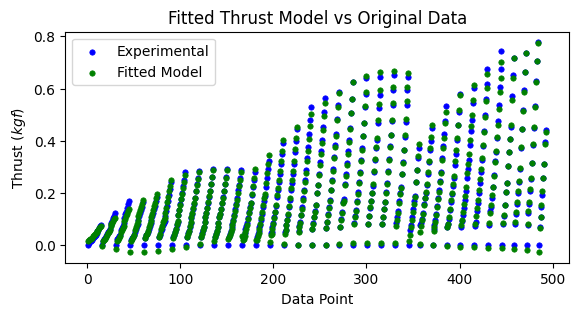

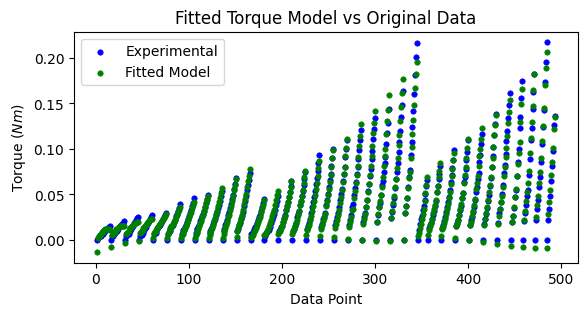

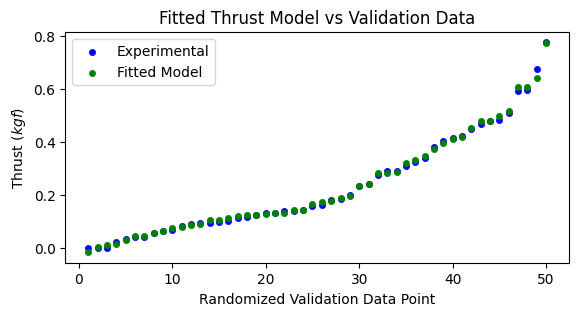

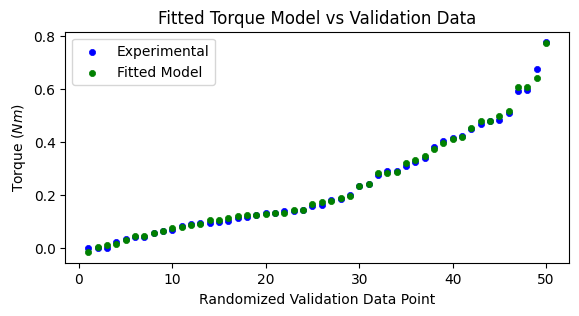

In [13]:
#### Validation of fitted model with optimal coefficients and function definitons 
data = pd.read_csv("average_zerod_v2_101214_update3.csv") 
# Original sequence 
x = data['0'].to_numpy()
y = data['1'].to_numpy()
z = data['2'].to_numpy()
T = data['3'].to_numpy()
Q = data['4'].to_numpy()

# Empty matrix for fitted thrust calculations
T_fitted = np.zeros(num_of_points)

# Calculate fitted thrust for reach data point
for k in range(num_of_points):
    T_fitted[k] = (a_star_T[0]*x[k]**3 + a_star_T[1]*y[k]**3 + a_star_T[2]*z[k]**3 + a_star_T[3]*x[k]**2*y[k] + a_star_T[4]*x[k]**2*z[k] + a_star_T[5]*y[k]**2*x[k] + a_star_T[6]*y[k]**2*z[k] + a_star_T[7]*z[k]**2*x[k] + a_star_T[8]*z[k]**2*y[k] + a_star_T[9]*x[k]**2 + a_star_T[10]*y[k]**2 + a_star_T[11]*z[k]**2 + a_star_T[12]*x[k]*y[k] + a_star_T[13]*x[k]*z[k] + a_star_T[14]*y[k]*z[k] + a_star_T[15]*x[k] + a_star_T[16]*y[k] + a_star_T[17]*z[k] + a_star_T[18]*x[k]*y[k]*z[k] + a_star_T[19])
    
# Empty matrix for fitted torque calculations
Q_fitted = np.zeros(num_of_points)

# Calculate fitted torque for each data point
for k in range(num_of_points):
    Q_fitted[k] = (a_star_Q[0]*x[k]**3 + a_star_Q[1]*y[k]**3 + a_star_Q[2]*z[k]**3 + a_star_Q[3]*x[k]**2*y[k] + a_star_Q[4]*x[k]**2*z[k] + a_star_Q[5]*y[k]**2*x[k] + a_star_Q[6]*y[k]**2*z[k] + a_star_Q[7]*z[k]**2*x[k] + a_star_Q[8]*z[k]**2*y[k] + a_star_Q[9]*x[k]**2 + a_star_Q[10]*y[k]**2 + a_star_Q[11]*z[k]**2 + a_star_Q[12]*x[k]*y[k] + a_star_Q[13]*x[k]*z[k] + a_star_Q[14]*y[k]*z[k] + a_star_Q[15]*x[k] + a_star_Q[16]*y[k] + a_star_Q[17]*z[k] + a_star_Q[18]*x[k]*y[k]*z[k] + a_star_Q[19])

###### Model vs Measured at each data point

# Array for index of each data point
m = np.arange(1,num_of_points+1,1)

# Plotting fit over entire range of data in order
fig_1 = plt.figure(figsize=(figsize_x,figsize_y))
ax1 = fig_1.add_subplot()
ax1.set_title(r"Fitted Thrust Model vs Original Data")
ax1.set_xlabel(r"Data Point")
ax1.set_ylabel(r'Thrust ($kgf$)')
line1 = ax1.scatter(m, T, c="blue", s = 15, linewidth=0.5, label = "Experimental")
line2 = ax1.scatter(m, T_fitted, c="green",s =15, linewidth=0.5, label = "Fitted Model")
plt.legend()

# plt.savefig('Fit_Figures/Thrust_Overall_fit.png', dpi='figure', format='png',
#         bbox_inches="tight", pad_inches=0.1,
#         facecolor='auto', edgecolor='auto')

# Plotting fit over entire range of data in order
fig_2 = plt.figure(figsize=(figsize_x,figsize_y))
ax2 = fig_2.add_subplot()
ax2.set_title(r"Fitted Torque Model vs Original Data")
ax2.set_xlabel(r"Data Point")
ax2.set_ylabel(r'Torque ($Nm$)')
line1 = ax2.scatter(m, Q, c="blue", s = 15, linewidth=0.5, label = "Experimental")
line2 = ax2.scatter(m, Q_fitted, c="green",s =15, linewidth=0.5, label = "Fitted Model")
plt.legend()

# plt.savefig('Fit_Figures/Torque_Overall_fit.png', dpi='figure', format='png',
#         bbox_inches="tight", pad_inches=0.1,
#         facecolor='auto', edgecolor='auto')



# Function definition for thrust model calculation
def Thrust_fit_line(x,y,z):
    F = (a_star_T[0]*x**3 + a_star_T[1]*y**3 + a_star_T[2]*z**3 + a_star_T[3]*x**2*y + a_star_T[4]*x**2*z + a_star_T[5]*y**2*x + a_star_T[6]*y**2*z + a_star_T[7]*z**2*x + a_star_T[8]*z**2*y 
         + a_star_T[9]*x**2 + a_star_T[10]*y**2 + a_star_T[11]*z**2 + a_star_T[12]*x*y + a_star_T[13]*x*z + a_star_T[14]*y*z + a_star_T[15]*x + a_star_T[16]*y + a_star_T[17]*z + a_star_T[18]*x*y*z+a_star_T[19])
    return F

# # Function definition for torque model calculation
def Torque_fit_line(x,y,z):
    F = (a_star_Q[0]*x**3 + a_star_Q[1]*y**3 + a_star_Q[2]*z**3 + a_star_Q[3]*x**2*y + a_star_Q[4]*x**2*z + a_star_Q[5]*y**2*x + a_star_Q[6]*y**2*z + a_star_Q[7]*z**2*x + a_star_Q[8]*z**2*y 
         + a_star_Q[9]*x**2 + a_star_Q[10]*y**2 + a_star_Q[11]*z**2 + a_star_Q[12]*x*y + a_star_Q[13]*x*z + a_star_Q[14]*y*z + a_star_Q[15]*x + a_star_Q[16]*y + a_star_Q[17]*z + a_star_Q[18]*x*y*z+a_star_Q[19])
    return F

# Calculate fitted values for validation data
T_fit_valid = Thrust_fit_line(x_valid, y_valid, z_valid)
Q_fit_valid = Torque_fit_line(x_valid, y_valid, z_valid)



# Simple array for validation index
m = np.arange(1,np.size(x_valid)+1,1)
T_fit_valid = np.sort(T_fit_valid)
T_valid = np.sort(T_valid)

##### Model vs validation data
fig_3 = plt.figure(figsize=(figsize_x,figsize_y))
ax3 = fig_3.add_subplot()
ax3.set_title(r"Fitted Thrust Model vs Validation Data")
ax3.set_xlabel(r"Randomized Validation Data Point")
ax3.set_ylabel(r'Thrust ($kgf$)')
line1 = ax3.scatter(m, T_valid, c="blue", s = 20, linewidth=0.5, label = "Experimental")
line2 = ax3.scatter(m, T_fit_valid, c="green",s =20, linewidth=0.5, label = "Fitted Model")
plt.legend()

plt.savefig('Fit_Figures/Thrust_Validation_fit.png', dpi='figure', format='png',
        bbox_inches="tight", pad_inches=0.1,
        facecolor='auto', edgecolor='auto')

Q_fit_valid = np.sort(T_fit_valid)
Q_valid = np.sort(T_valid)

##### Model vs validation data
fig_4 = plt.figure(figsize=(figsize_x,figsize_y))
ax4 = fig_4.add_subplot()
ax4.set_title(r"Fitted Torque Model vs Validation Data")
ax4.set_xlabel(r"Randomized Validation Data Point")
ax4.set_ylabel(r'Torque ($Nm$)')
line1 = ax4.scatter(m, Q_valid, c="blue", s = 20, linewidth=0.5, label = "Experimental")
line2 = ax4.scatter(m, Q_fit_valid, c="green",s =20, linewidth=0.5, label = "Fitted Model")
plt.legend()

plt.savefig('Fit_Figures/Torque_Validation_fit.png', dpi='figure', format='png',
        bbox_inches="tight", pad_inches=0.1,
        facecolor='auto', edgecolor='auto')

plt.show()

Calculation of FOM for Validation Data as Reference

C:\Users\Daniel\AppData\Local\Temp\ipykernel_10536\3071385927.py:21: RuntimeWarning: invalid value encountered in power
  num = (kgf_to_N*(a_star_T[0]*x**3 + a_star_T[1]*y**3 + a_star_T[2]*z**3 + a_star_T[3]*x**2*y + a_star_T[4]*x**2*z
C:\Users\Daniel\AppData\Local\Temp\ipykernel_10536\3071385927.py:32: RuntimeWarning: divide by zero encountered in divide
  return const*num/dem


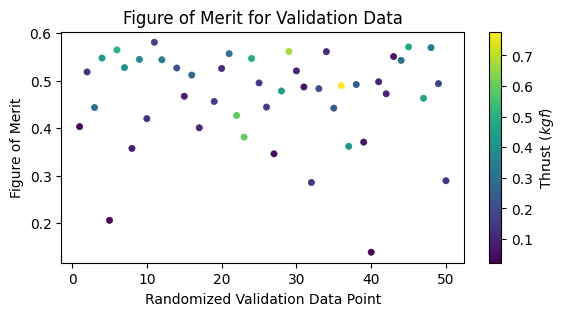

In [4]:
def figure_of_merit(x,y,z):
        
        ### UNITS
        # x - inches
        # y - deg
        # z - mRPM
        # T- kgf
        # Q - Nm

        
        
        # Conversions
        kgf_to_N = 9.80665          # convert T_fitted (kgf) to (N)
        krpm_to_rps = (10**3)/60    # Convert rotation speed (kRPM) to (rps)
        in_to_m = 0.0254            # convert diameter (in) to (m) 
        rho = 1.2754    # air density KG/M^3
        
        # Constant value
        const = sqrt(1/(2*rho*(pi**3)))
        # numerator
        num = (kgf_to_N*(a_star_T[0]*x**3 + a_star_T[1]*y**3 + a_star_T[2]*z**3 + a_star_T[3]*x**2*y + a_star_T[4]*x**2*z
                            + a_star_T[5]*y**2*x + a_star_T[6]*y**2*z + a_star_T[7]*z**2*x + a_star_T[8]*z**2*y + a_star_T[9]*x**2 
                            + a_star_T[10]*y**2 + a_star_T[11]*z**2 + a_star_T[12]*x*y + a_star_T[13]*x*z + a_star_T[14]*y*z 
                            + a_star_T[15]*x + a_star_T[16]*y + a_star_T[17]*z + a_star_T[18]*x*y*z + a_star_T[19]))**(3/2)
        
        # denominator 
        dem = (z*krpm_to_rps)*(x*in_to_m)*(a_star_Q[0]*x**3 + a_star_Q[1]*y**3 + a_star_Q[2]*z**3 + a_star_Q[3]*x**2*y + a_star_Q[4]*x**2*z
                            + a_star_Q[5]*y**2*x + a_star_Q[6]*y**2*z + a_star_Q[7]*z**2*x + a_star_Q[8]*z**2*y + a_star_Q[9]*x**2 
                            + a_star_Q[10]*y**2 + a_star_Q[11]*z**2 + a_star_Q[12]*x*y + a_star_Q[13]*x*z + a_star_Q[14]*y*z 
                            + a_star_Q[15]*x + a_star_Q[16]*y + a_star_Q[17]*z + a_star_Q[18]*x*y*z + a_star_Q[19])
        
        return const*num/dem


# Calculate FOM for validation data
fom = figure_of_merit(x_valid, y_valid, z_valid)

m = np.arange(1,np.size(x_valid)+1,1)

##### Model vs validation data
fig = plt.figure(figsize=(figsize_x,figsize_y))
ax = fig.add_subplot()
ax.set_title(r"Figure of Merit for Validation Data")
ax.set_xlabel(r"Randomized Validation Data Point")
ax.set_ylabel(r'Figure of Merit')
line1 = ax.scatter(m, fom, s = 20, linewidth=0.5, c = T_valid)
plt.colorbar(line1, label="Thrust ($kgf$)", ax=ax)


plt.savefig('Fit_Figures/randomized_fom.png', dpi='figure', format='png',
        bbox_inches="tight", pad_inches=0.1,
        facecolor='auto', edgecolor='auto')



In [4]:
data1 = pd.DataFrame(a_star_T)
data2 = pd.DataFrame(a_star_Q)

data1.to_csv("a_star_T1.csv")
data2.to_csv("a_star_Q1.csv")

In [5]:
a_star_T = pd.read_csv('a_star_T.csv')
a_star_Q = pd.read_csv('a_star_Q.csv')

a_star_T = a_star_T['0'].to_numpy()
a_star_Q = a_star_Q['0'].to_numpy()

Uncertainity Equations

In [8]:
aoa_uncert = 0.326
def thrust_uncertainty(x,y,z):
    T = (a_star_T[1]*3*y**2 + a_star_T[3]*x**2 + a_star_T[5]*2*y*x + a_star_T[6]*2*y*z + a_star_T[8]*z**2 
            + a_star_T[10]*2*y + a_star_T[12]*x + a_star_T[14]*z + a_star_T[16] + a_star_T[18]*x*z)

    return abs(T*aoa_uncert)
    
def torque_uncertainty(x,y,z):
    Q = (a_star_Q[1]*3*y**2 + a_star_Q[3]*x**2 + a_star_Q[5]*2*y*x + a_star_Q[6]*2*y*z + a_star_Q[8]*z**2 
            + a_star_Q[10]*2*y + a_star_Q[12]*x + a_star_Q[14]*z + a_star_Q[16] + a_star_Q[18]*x*z)

    return abs(Q*aoa_uncert)
    
# Conversions
kgf_to_N = 9.80665          # convert T_fitted (kgf) to (N)
krpm_to_rps = (10**3)/60    # Convert rotation speed (kRPM) to (rps)
in_to_m = 0.0254            # convert diameter (in) to (m)     
    
def obj_thrust_uncert(x,y,z,lam,T_goal):

    
    return ((z*krpm_to_rps)*(x*in_to_m)*(a_star_Q[0]*x**3 + a_star_Q[1]*y**3 + a_star_Q[2]*z**3 + a_star_Q[3]*x**2*y + a_star_Q[4]*x**2*z
                                + a_star_Q[5]*y**2*x + a_star_Q[6]*y**2*z + a_star_Q[7]*z**2*x + a_star_Q[8]*z**2*y + a_star_Q[9]*x**2 
                                + a_star_Q[10]*y**2 + a_star_Q[11]*z**2 + a_star_Q[12]*x*y + a_star_Q[13]*x*z + a_star_Q[14]*y*z 
                                + a_star_Q[15]*x + a_star_Q[16]*y + a_star_Q[17]*z + a_star_Q[18]*x*y*z + a_star_Q[19])
                            + 2*lam*(kgf_to_N*(a_star_T[0]*x**3 + a_star_T[1]*y**3 + a_star_T[2]*z**3 + a_star_T[3]*x**2*y + a_star_T[4]*x**2*z
                                + a_star_T[5]*y**2*x + a_star_T[6]*y**2*z + a_star_T[7]*z**2*x + a_star_T[8]*z**2*y + a_star_T[9]*x**2 
                                + a_star_T[10]*y**2 + a_star_T[11]*z**2 + a_star_T[12]*x*y + a_star_T[13]*x*z + a_star_T[14]*y*z 
                                + a_star_T[15]*x + a_star_T[16]*y + a_star_T[17]*z + a_star_T[18]*x*y*z + a_star_T[19])-kgf_to_N*T_goal))

def obj_torque_uncert(x,y,z,lam,T_goal):

    return ((z*krpm_to_rps)*(x*in_to_m)
                            + 2*lam*(kgf_to_N*(a_star_T[0]*x**3 + a_star_T[1]*y**3 + a_star_T[2]*z**3 + a_star_T[3]*x**2*y + a_star_T[4]*x**2*z
                                + a_star_T[5]*y**2*x + a_star_T[6]*y**2*z + a_star_T[7]*z**2*x + a_star_T[8]*z**2*y + a_star_T[9]*x**2 
                                + a_star_T[10]*y**2 + a_star_T[11]*z**2 + a_star_T[12]*x*y + a_star_T[13]*x*z + a_star_T[14]*y*z 
                                + a_star_T[15]*x + a_star_T[16]*y + a_star_T[17]*z + a_star_T[18]*x*y*z + a_star_T[19])-kgf_to_N*T_goal))


FOM Optimization Function

In [9]:
# fom optimization
diameter = data['0'].to_numpy()
aoa = data['1'].to_numpy()
rpm = data['2'].to_numpy()
Thrust = data['3'].to_numpy()
Torque = data['4'].to_numpy()



def fom_optimization(T_goal, x_0, tol_percent, x_min, x_max):
    # Initial Conditions
    n=1             # iteration
    nmax = 10000     # max iteration

    scale = 1.5     # lambda scale multiplier
    lam = 0.5       # lagrange multiplier
    
    # error tolerance
    tol_perc = tol_percent
    tol = tol_perc*T_goal
    
    # Zone boundary penalty       
    boundary_penalty = 1000    

    # Optimization bounds
    minx = x_min; maxx =x_max        # inches
    miny = -3; maxy = 13.5      # deg
    minz = 2;  maxz = 5       # kRPM

    rho = 1.2754    # air density KG/M^3

    # Figure of Merit 
    def figure_of_merit(x,y,z):
        
        ### UNITS
        # x - inches
        # y - deg
        # z - mRPM
        # T- kgf
        # Q - Nm

        # Constant value
        const = sqrt(1/(2*rho*(pi**3)))
        
        # Conversions
        kgf_to_N = 9.80665          # convert T_fitted (kgf) to (N)
        krpm_to_rps = (10**3)/60    # Convert rotation speed (kRPM) to (rps)
        in_to_m = 0.0254            # convert diameter (in) to (m) 
        
        # numerator
        num = (kgf_to_N*(a_star_T[0]*x**3 + a_star_T[1]*y**3 + a_star_T[2]*z**3 + a_star_T[3]*x**2*y + a_star_T[4]*x**2*z
                            + a_star_T[5]*y**2*x + a_star_T[6]*y**2*z + a_star_T[7]*z**2*x + a_star_T[8]*z**2*y + a_star_T[9]*x**2 
                            + a_star_T[10]*y**2 + a_star_T[11]*z**2 + a_star_T[12]*x*y + a_star_T[13]*x*z + a_star_T[14]*y*z 
                            + a_star_T[15]*x + a_star_T[16]*y + a_star_T[17]*z + a_star_T[18]*x*y*z + a_star_T[19]))**(3/2)
        
        # denominator 
        dem = (z*krpm_to_rps)*(x*in_to_m)*(a_star_Q[0]*x**3 + a_star_Q[1]*y**3 + a_star_Q[2]*z**3 + a_star_Q[3]*x**2*y + a_star_Q[4]*x**2*z
                            + a_star_Q[5]*y**2*x + a_star_Q[6]*y**2*z + a_star_Q[7]*z**2*x + a_star_Q[8]*z**2*y + a_star_Q[9]*x**2 
                            + a_star_Q[10]*y**2 + a_star_Q[11]*z**2 + a_star_Q[12]*x*y + a_star_Q[13]*x*z + a_star_Q[14]*y*z 
                            + a_star_Q[15]*x + a_star_Q[16]*y + a_star_Q[17]*z + a_star_Q[18]*x*y*z + a_star_Q[19])
        
        return const*num/dem

    # Nelder mead optimization objective function
    def obj_function(p):
        
        ### UNITS
        # x - inches
        # y - deg
        # z - mRPM
        # T- kgf
        # Q - Nm
        
        # Conversions
        kgf_to_N = 9.80665          # convert T_fitted (kgf) to (N)
        krpm_to_rps = (10**3)/60    # Convert rotation speed (mRPM) to (rps)
        in_to_m = 0.0254            # convert diameter (in) to (m) 
        
        x = p[0]    # diameter
        y = p[1]    # aoa
        z = p[2]    # kRPM

        # Penalize searches in regions without data
        if x > 12 and y > 12:              # no data for 14in 13.5 aoa
            return boundary_penalty
        if x > 12 and y > 10.5 and z > 3:  # no data for 14in 12aoa above 3kRPM
            return boundary_penalty
        if x > 12 and z > 4:               # no data for 14in propellers agove 3kRPM       
            return boundary_penalty
       
        else:   # objective function nDQ + lam*(T-T_goal)^2
            return ((z*krpm_to_rps)*(x*in_to_m)*(a_star_Q[0]*x**3 + a_star_Q[1]*y**3 + a_star_Q[2]*z**3 + a_star_Q[3]*x**2*y + a_star_Q[4]*x**2*z
                                + a_star_Q[5]*y**2*x + a_star_Q[6]*y**2*z + a_star_Q[7]*z**2*x + a_star_Q[8]*z**2*y + a_star_Q[9]*x**2 
                                + a_star_Q[10]*y**2 + a_star_Q[11]*z**2 + a_star_Q[12]*x*y + a_star_Q[13]*x*z + a_star_Q[14]*y*z 
                                + a_star_Q[15]*x + a_star_Q[16]*y + a_star_Q[17]*z + a_star_Q[18]*x*y*z + a_star_Q[19])
                            + lam*(kgf_to_N*(a_star_T[0]*x**3 + a_star_T[1]*y**3 + a_star_T[2]*z**3 + a_star_T[3]*x**2*y + a_star_T[4]*x**2*z
                                + a_star_T[5]*y**2*x + a_star_T[6]*y**2*z + a_star_T[7]*z**2*x + a_star_T[8]*z**2*y + a_star_T[9]*x**2 
                                + a_star_T[10]*y**2 + a_star_T[11]*z**2 + a_star_T[12]*x*y + a_star_T[13]*x*z + a_star_T[14]*y*z 
                                + a_star_T[15]*x + a_star_T[16]*y + a_star_T[17]*z + a_star_T[18]*x*y*z + a_star_T[19])-kgf_to_N*T_goal)**2)


    # Thrust coefficient
    def k_T(D, n, T):
        
        
        kgf_to_N = 9.80665          # kgf to N
        krpm_to_rps = (10**3)/60    # kRPM to rev/s
        in_to_m = 0.0254            # in to m
        
        # conversions
        T = kgf_to_N*T              
        n = krpm_to_rps*n
        D = in_to_m*D
        return T/(rho*n**2*D**4)

    # Torque coefficient
    def k_Q(D, n, Q):
        
        krpm_to_rps = (10**3)/60    # kRPM to rev/s
        in_to_m = 0.0254            # in to m
        
        # Conversions
        n = krpm_to_rps*n 
        D = in_to_m*D
        
        return Q/(rho*n**2*D**5)

    # Uncertainty Propagation
    def fom_uncertainty(x, y, z, T, Q):
        
        ### UNITS
        # x - inches
        # y - deg
        # z - mRPM
        # T- kgf
        # Q - Nm
        
        # Conversions
        kgf_to_N = 9.80665          # kgf to N
        krpm_to_rps = (10**3)/60    # kRPM to rev/s
        in_to_m = 0.0254            # in to m  
        
        # conversions
        n = krpm_to_rps*z   
        D = in_to_m*x       
        
        # Calcualate fom constant
        const = sqrt(1/(2*rho*(pi**3)))
        
        # Determine closest experimental Diameter to optimal for reference
        set_of_diameters = np.arange(10, 16, 2)
        difference_array = np.absolute(set_of_diameters-x)
        index = difference_array.argmin()
        Diam_ref = set_of_diameters[index]
        

        # Determine closest experimental aoa to optimal for reference
        set_of_angles = np.arange(-3, 15, 1.5)
        if x == 10:
            set_of_angles = np.delete(set_of_angles, 4)
        difference_array = np.absolute(set_of_angles - y)
        index = difference_array.argmin()
        aoa_ref = set_of_angles[index]


        # Collect reference data that matches diameter
        index = np.where(diameter == Diam_ref)
        diam = diameter[index]
        angle = aoa[index]
        speed = rpm[index]
        T_sigma = T_uncert[index]
        Q_sigma = Q_uncert[index]
        Thrust_setpoint = Thrust[index]
        Torque_setpoint = Torque[index]
        
        # Collect reference data that matches angle of attack
        index = np.where(angle == aoa_ref)
        diam = diam[index]
        angle = aoa[index]
        T_sigma = T_sigma[index]
        speed = speed[index]
        Q_sigma = Q_sigma[index]
        Thrust_setpoint = Thrust_setpoint[index]
        Torque_setpoint = Torque_setpoint[index]

        # Determine closest experimental speed to optimal for reference
 
        difference_array = np.absolute(speed - z)
        index = difference_array.argmin()
        
        # Collect reference data that matches speed 
        T_sigma = T_sigma[index]
        Q_sigma = Q_sigma[index]
        Thrust_setpoint = Thrust_setpoint[index]
        Torque_setpoint = Torque_setpoint[index]

        # aoa thrust uncertainty
        T_sigma_aoa = thrust_uncertainty(x,y,z)

        # aoa torque uncertainty
        Q_sigma_aoa = torque_uncertainty(x,y,z)
        
        
        # derivative of fom wrt thrust
        df_dT = (3/2)*const*(T*kgf_to_N)**(1/2)/(n*D*Q)

        # derivative of fom wrt to torque
        df_dQ = -const*(T*kgf_to_N)**(3/2)/(n*D*Q**2)

        T_sigma_total = sqrt(T_sigma**2 + T_sigma_aoa**2)
        Q_sigma_total = sqrt(Q_sigma**2 + Q_sigma_aoa**2)
        
        T_bias = 0.005*Thrust_setpoint+0.005
        Q_bias = 0.005*Torque_setpoint+0.005

        # error propagation
        return sqrt(df_dT**2*((sqrt(T_bias**2 + (2*T_sigma_total)**2))*kgf_to_N)**2 + df_dQ**2*(sqrt(Q_bias**2 + (2*Q_sigma_total)**2))**2)
    
    def obj_uncert_search(x, y, z, lam, fom, fom_sigma):
        
        ### UNITS
        # x - inches
        # y - deg
        # z - mRPM
        # T- kgf
        # Q - Nm
        
        # Conversions
        kgf_to_N = 9.80665          # kgf to N
        krpm_to_rps = (10**3)/60    # kRPM to rev/s
        in_to_m = 0.0254            # in to m  
        
        # conversions
        n = krpm_to_rps*z   
        D = in_to_m*x       
        
        # Calcualate fom constant
        const = sqrt(1/(2*rho*(pi**3)))
        
        # Determine closest experimental Diameter to optimal for reference
        set_of_diameters = np.arange(10, 16, 2)
        difference_array = np.absolute(set_of_diameters-x)
        index = difference_array.argmin()
        Diam_ref = set_of_diameters[index]
        

        # Determine closest experimental aoa to optimal for reference
        set_of_angles = np.arange(-3, 15, 1.5)
        if x == 10:
            set_of_angles = np.delete(set_of_angles, 4)
        difference_array = np.absolute(set_of_angles - y)
        index = difference_array.argmin()
        aoa_ref = set_of_angles[index]


        # Collect reference data that matches diameter
        index = np.where(diameter == Diam_ref)
        diam = diameter[index]
        angle = aoa[index]
        speed = rpm[index]
        T_sigma = T_uncert[index]
        Q_sigma = Q_uncert[index]
        Thrust_setpoint = Thrust[index]
        Torque_setpoint = Torque[index]
        
        # Collect reference data that matches angle of attack
        index = np.where(angle == aoa_ref)
        diam = diam[index]
        angle = aoa[index]
        T_sigma = T_sigma[index]
        speed = speed[index]
        Q_sigma = Q_sigma[index]
        Thrust_setpoint = Thrust_setpoint[index]
        Torque_setpoint = Torque_setpoint[index]

        
        # Determine closest experimental speed to optimal for reference
        difference_array = np.absolute(speed - z)
        index = difference_array.argmin()
        
        # Collect reference data that matches speed 
        T_sigma = T_sigma[index]
        Q_sigma = Q_sigma[index]
        Thrust_setpoint = Thrust_setpoint[index]
        Torque_setpoint = Torque_setpoint[index]
        diam = diam[index]
        angle = aoa[index]
        speed = speed[index]
        # aoa thrust uncertainty
        T_sigma_aoa = thrust_uncertainty(x,y,z)

        # aoa torque uncertainty
        Q_sigma_aoa = torque_uncertainty(x,y,z)
        
        
        # derivative of fom wrt thrust
        df_dT = obj_thrust_uncert(x,y,z,lam,T_goal)

        # derivative of fom wrt to torque
        df_dQ = obj_torque_uncert(x,y,z,lam,T_goal)

        T_sigma_total = sqrt(T_sigma**2 + T_sigma_aoa**2)
        Q_sigma_total = sqrt(Q_sigma**2 + Q_sigma_aoa**2)
        
        T_bias = 0.005*Thrust_setpoint+0.005
        Q_bias = 0.005*Torque_setpoint+0.005

        
        
        step = 0.01
        obj_sigma = sqrt(df_dT**2*((sqrt(T_bias**2 + (2*T_sigma_total)**2))*kgf_to_N)**2 + df_dQ**2*(sqrt(Q_bias**2 + (2*Q_sigma_total)**2))**2)
        obj = obj_function(np.array([x,y,z]))  
              
              
        x_new = x  
        
   
        if lam < 100:
            for i in range(len(np.arange(0,1000,1))):
                x_new = x_new + step
                obj_new =  obj_function(np.array([x_new,y,z]))

                if obj_new > (obj+obj_sigma): 
                    x_new = x_new - step
                    D_fwd = x_new
                    break
                if i == 999:
                    D_fwd =1
                
            
    
            step = 0.01
            x_new = x   
            for i in range(len(np.arange(0,1000,1))):
                x_new = x_new - step
                obj_new =  obj_function(np.array([x_new,y,z]))  
                if obj_new > (obj+obj_sigma): 

                    x_new = x_new + step
                    D_bkwd = x_new
                    break
                if i == 999:
                    D_bkwd =1
                    
                    
                    
            # ------------------
            y_new = y
            for i in range(len(np.arange(0,1000,1))):
                y_new = y_new + step
                obj_new =  obj_function(np.array([x,y_new,z]))  
                if obj_new > (obj+obj_sigma): 

                    y_new = y_new - step
                    aoa_fwd = y_new
                    break
                if i == 999:
                    aoa_fwd =1
                    
                    
                                
            y_new = y
            for i in range(len(np.arange(0,1000,1))):
                y_new = y_new - step
                obj_new =  obj_function(np.array([x,y_new,z]))  
                if obj_new > (obj+obj_sigma): 

                    y_new = y_new + step
                    aoa_bkwd = y_new
                    break      
                if i == 999:
                    aoa_bkwd =1
                    
                    
                                    
            # ------------------
            
            z_new = z   
            for i in range(len(np.arange(0,1000,1))):
                z_new = z_new + step
                obj_new =  obj_function(np.array([x,y,z_new]))  
                if obj_new > (obj+obj_sigma): 

                    z_new = z_new - step
                    z_fwd = z_new
                    break
                if i == 999:
                    z_fwd =1            

            z_new = z 
            for i in range(len(np.arange(0,1000,1))):
                z_new = z_new - step
                obj_new =  obj_function(np.array([x,y,z_new]))  
                if obj_new > (obj+obj_sigma): 
                    z_new = z_new + step
                    z_bkwd = z_new
                    break      
                if i == 999:
                    z_bkwd =1
                    
                            
            return  D_fwd, D_bkwd, aoa_fwd, aoa_bkwd, z_fwd, z_bkwd, obj, obj_sigma
        else: 
            return 1,1,1,1,1,1,obj,obj_sigma
        


    while n < nmax:
        
        # Nelder mead optimization
        sol = sp.optimize.minimize(obj_function, x_0, method='Nelder-Mead', bounds=((minx,maxx),(miny,maxy),(minz,maxz)) )

        # Calculate Thrust of optimal point
        T_xstar = Thrust_fit_line(sol.x[0],sol.x[1],sol.x[2])
        
        

        # Check if tolerance satisfied 
        if T_xstar >= T_goal-tol and T_xstar <= T_goal+tol:
            
            # store last completed iteration
            nfinal = n
            # terminate while loop
            n = nmax
            
            # Store values 
            x_star = np.array([sol.x[0],sol.x[1],sol.x[2]])
            x_star = np.round(x_star, 3)
            Q_xstar = Torque_fit_line(sol.x[0],sol.x[1],sol.x[2]) 
            k_t = k_T(sol.x[0], sol.x[2], T_xstar)
            k_q = k_Q(sol.x[0], sol.x[2], Q_xstar)
            nDQ = sol.x[2]*(10**3)/60 *sol.x[0]*0.0254 *Q_xstar
            FOM = figure_of_merit(sol.x[0],sol.x[1],sol.x[2])
            fom_sigma = fom_uncertainty(sol.x[0], sol.x[1], sol.x[2], T_xstar, Q_xstar)
            D_fwd, D_bkwd, aoa_fwd, aoa_bkwd, z_fwd, z_bkwd, obj, obj_sigma = obj_uncert_search(sol.x[0],sol.x[1],sol.x[2], lam, T_xstar, Q_xstar)
            
        else:
            
            lam = lam*scale                                     # scale up lambda
            x_0 = np.array([sol.x[0],sol.x[1],sol.x[2]])        # store last solution as next iteration starting point
            n = n + 1                                           # iterate counter

            # lower tolerance requirement if T_goal not reached
            if n > 20:                                          
                tol_perc = tol_perc + tol_perc*0.1
                tol = tol_perc*T_goal



    return x_star, lam, T_xstar, k_t, Q_xstar, k_q, nDQ, FOM, fom_sigma, D_fwd, D_bkwd, aoa_fwd, aoa_bkwd, z_fwd, z_bkwd, obj, obj_sigma

Single thrust goal validation

In [13]:
# Empty data frame 

df = pd.DataFrame(index=['x_0', 'x_star', 'x', 'y', 'z', 'lam', 'T_xstar', 'k_t', 'Q_xstar', 'k_q', 'nDQ', 'FOM', 'FOM_uncert', 'error', 
                             'D_fwd', 'D_bkwd', 'aoa_fwd', 'aoa_bkwd', 'z_fwd', 'z_bkwd', 'obj', 'obj_sigma'])

# Initial conditions
T_goal = 0.4     # Specifiy Thrust goal (kgf)
num = 100           # Specify number of intial points to test
tol_percent = 0.01  # Specify tolerance percentage

x_min = 12
x_max = 12


n = 0  # Initialize counter              


for i in range(num):
    
    # randomize starting point between bounds
    x_0 = np.array([random.uniform(x_min,x_max), random.uniform(-3,12), random.uniform(2,4)])
    x_0 = np.around(x_0, decimals=3)

    # Preform fom optmization
    x_star, lam, T_xstar, k_t, Q_xstar, k_q, nDQ, FOM, FOM_uncert, D_fwd, D_bkwd, aoa_fwd, aoa_bkwd, z_fwd, z_bkwd, obj, obj_sigma = fom_optimization(T_goal, x_0, tol_percent,x_min,x_max)

    # Store values in data frame
    df[f'{n}'] = [x_0, x_star, x_star[0], x_star[1], x_star[2], lam, T_xstar, k_t, Q_xstar, k_q, nDQ, FOM, FOM_uncert, 
                abs(T_goal- T_xstar), D_fwd, D_bkwd, aoa_fwd, aoa_bkwd, z_fwd, z_bkwd, obj, obj_sigma]
    
    # Iterate counter
    n=n+1 

# Data frame transposed and saved
df = df.T
df.to_csv('fom_results.csv')



2D Optimization

In [15]:

# Initial conditions
T_goal = np.arange(0.05, 0.3, 0.01)      # Specify Thrust goals to test
num = 100                                   # Specify numer of initial conditions to test
tol_percent = 0.01                          # Specify tolerance percentage
x_min = 10
x_max = 10
n = 0   # Initialize counter

# Initialize arrays for results       
x_star_set = np.zeros((np.size(T_goal), 3))
FOM_uncert_set = np.zeros(np.size(T_goal))

# Initialize results dataframe
df2 = pd.DataFrame(index=['x', 'y', 'z', 'lam', 'T_goal','T_xstar',  'k_t', 'Q_xstar', 'k_q', 'nDQ', 'FOM', 'FOM_uncert', 
                          'D_fwd', 'D_bkwd', 'aoa_fwd', 'aoa_sigma_fwd' ,'aoa_bkwd', 'aoa_sigma_bkwd', 'z_fwd', 'z_sigma_fwd','z_bkwd', 'z_sigma_bkwd','obj', 'obj_sigma', 'obj_uncert'])


for j in range(np.size(T_goal)):

    # Empty data frame 
    df = pd.DataFrame(index=['x_0', 'x_star', 'x', 'y', 'z', 'lam', 'T_xstar', 'k_t', 'Q_xstar', 'k_q', 'nDQ', 'FOM', 'FOM_uncert', 'error', 
                             'D_fwd', 'D_bkwd', 'aoa_fwd', 'aoa_bkwd', 'z_fwd', 'z_bkwd', 'obj', 'obj_sigma'])



    for i in range(num):

        # randomize starting point between bounds
        x_0 = np.array([random.uniform(x_min,x_max), random.uniform(-3,12), random.uniform(2,4)])
        x_0 = np.around(x_0, decimals=3)

        # Preform fom optmization
        x_star, lam, T_xstar, k_t, Q_xstar, k_q, nDQ, FOM, FOM_uncert, D_fwd, D_bkwd, aoa_fwd, aoa_bkwd, z_fwd, z_bkwd, obj, obj_sigma = fom_optimization(T_goal[j], x_0, tol_percent,x_min,x_max)
        
        # Store values in data frame
        df[f'{n}'] = [x_0, x_star, x_star[0], x_star[1], x_star[2], lam, T_xstar, k_t, Q_xstar, k_q, nDQ, FOM, FOM_uncert, 
                    abs(T_goal[j] - T_xstar), D_fwd, D_bkwd, aoa_fwd, aoa_bkwd, z_fwd, z_bkwd, obj, obj_sigma]

        # Iterate counter
        n=n+1 
        
        
        print(f'{i/100} %', end='\r')
        
    # Transpose data frame
    df = df.T

    # Collect optimal results
    df = df.to_numpy()
    
    

    # Find indexes where FOM is greater than 90% of max FOM
    index = np.where(df[:,11] >= 0.9*np.max(df[:,11]))
    index=index[0]
    df = df[index, :] 

    # Find indexes where thrust error is less than 1.2x the minimum error
    error = df[:,13]
    index = np.where(error <= (np.min(error)+0.2*np.min(error)))
    index=index[0]

    # Find the maximum FOM out of this set
    index = np.where(df[:,11] == np.max(df[:,11]))
    index = index[0]
    
    if np.size(index) > 1:
        index = index[0]
     
    

      
    x_star_set[j, 0] = df[index,2]
    x_star_set[j, 1] = df[index,3]
    x_star_set[j, 2] = df[index,4]
    print(x_star_set[j, :])
    df2[f'{j}'] = [x_star_set[j, 0], x_star_set[j, 1], x_star_set[j, 2], df[index,5],  T_goal[j], df[index,6], df[index,7], df[index,8], df[index,9], df[index,10], 
                   df[index,11], df[index,12], df[index,14], df[index,15], df[index,16], df[index,16] - x_star_set[j, 1], df[index,17], x_star_set[j, 1]- df[index,17], 
                   df[index,18], df[index,18] - x_star_set[j, 2], df[index,19], x_star_set[j, 2]-df[index,19] ,df[index,20], df[index,21], df[index,20] + df[index,21]]
    
    print(f'{round(j/np.size(T_goal), 2)*100} %')

df2 = df2.T

df2.to_csv("10in_optimal_fom.csv")




[10.     9.208  2.138]
0.0 %
[10.     8.866  2.334]
4.0 %
[10.     8.573  2.512]
8.0 %
[10.     8.302  2.683]
12.0 %
[10.     8.054  2.847]
16.0 %
[10.     7.823  3.004]
20.0 %
[10.     7.604  3.157]
24.0 %
[10.     7.395  3.305]
28.000000000000004 %
[10.     7.191  3.451]
32.0 %
[10.     7.001  3.588]
36.0 %
[10.     6.802  3.73 ]
40.0 %
[10.     6.601  3.872]
44.0 %
[10.     6.395  4.014]
48.0 %
[10.     6.178  4.157]
52.0 %
[10.     5.944  4.303]
56.00000000000001 %
[10.     5.682  4.454]
60.0 %
[10.     5.371  4.616]
64.0 %
[10.     4.946  4.802]
68.0 %
[10.     4.516  5.   ]
72.0 %
[10.     5.128  5.   ]
76.0 %
[10.     5.785  5.   ]
80.0 %
[10.     6.498  5.   ]
84.0 %
[10.     7.382  5.   ]
88.0 %
[10.     8.454  5.   ]
92.0 %
[10.    10.278  5.   ]
96.0 %
